## USAGERS

<label>Tasks</label>
<ul>
    <input type="checkbox"> Task 1 : Gérer les valeurs -1 et 0 pour le champ 'Place' <br>
    <input type="checkbox"> Task 2 : Gérer les valeurs 4 pour le champ 'Catu' : considéré comme des NAN <br>
    <input type="checkbox"> Task 3 : Les catégories non renseignées (-1 et 0) du champ 'Trajet' doivent-elles être regroupées ?<br>
    <input type="checkbox"> Task 4 : Préciser définition des champs : secu, secu1, secu2, secu3 <br>
</ul>

In [1]:
#(1) Import des packages
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import missingno as msno

In [2]:
import datetime as dt

In [3]:
usag = pd.read_csv('usagers.csv', low_memory=False)
#pd.read_csv(io.BytesIO(uploaded["usagers (3).csv"]), error_bad_lines=False, sep=',', encoding='latin-1')
usag.head(10)

,Unnamed: 0,num_acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,annee,id_vehicule,secu1,secu2,secu3
0,1,2.005000e+11,1.0,1,4,1,1.0,11.0,0.0,0,0.0,1976.0,A01,2005,NaN,NaN,NaN,NaN
1,2,2.005000e+11,1.0,1,3,2,3.0,11.0,0.0,0,0.0,1968.0,B02,2005,NaN,NaN,NaN,NaN
2,3,2.005000e+11,2.0,2,1,1,0.0,11.0,0.0,0,0.0,1964.0,B02,2005,NaN,NaN,NaN,NaN
3,4,2.005000e+11,4.0,2,1,1,0.0,31.0,0.0,0,0.0,2004.0,B02,2005,NaN,NaN,NaN,NaN
4,5,2.005000e+11,5.0,2,1,1,0.0,11.0,0.0,0,0.0,1998.0,B02,2005,NaN,NaN,NaN,NaN
5,6,2.005000e+11,3.0,2,1,2,0.0,11.0,0.0,0,0.0,1991.0,B02,2005,NaN,NaN,NaN,NaN
6,7,2.005000e+11,1.0,1,1,1,5.0,11.0,0.0,0,0.0,1955.0,A01,2005,NaN,NaN,NaN,NaN
7,8,2.005000e+11,1.0,1,3,1,5.0,21.0,0.0,0,0.0,1979.0,B02,2005,NaN,NaN,NaN,NaN
8,9,2.005000e+11,1.0,1,1,1,1.0,21.0,0.0,0,0.0,1983.0,A01,2005,NaN,NaN,NaN,NaN
9,10,2.005000e+11,1.0,1,3,1,1.0,21.0,0.0,0,0.0,1956.0,B02,2005,NaN,NaN,NaN,NaN


In [4]:
usag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509620 entries, 0 to 2509619
Data columns (total 18 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   num_acc      float64
 2   place        float64
 3   catu         int64  
 4   grav         int64  
 5   sexe         int64  
 6   trajet       float64
 7   secu         float64
 8   locp         float64
 9   actp         object 
 10  etatp        float64
 11  an_nais      float64
 12  num_veh      object 
 13  annee        int64  
 14  id_vehicule  object 
 15  secu1        float64
 16  secu2        float64
 17  secu3        float64
dtypes: float64(10), int64(5), object(3)
memory usage: 344.6+ MB


In [5]:
usag.describe()

,Unnamed: 0,num_acc,place,catu,grav,sexe,trajet,secu,locp,etatp,an_nais,annee,secu1,secu2,secu3
count,2.509620e+06,2.509620e+06,2.386492e+06,2.509620e+06,2.509620e+06,2.509620e+06,2.509126e+06,2.085658e+06,2.453259e+06,2.453202e+06,2.504135e+06,2.509620e+06,367425.000000,367425.000000,367425.000000
mean,1.254810e+06,2.012251e+11,1.426311e+00,1.341396e+00,2.516410e+00,1.323586e+00,3.139610e+00,1.796288e+01,1.660656e-01,-3.379339e-02,1.974626e+03,2.012250e+03,1.979582,1.216251,-0.915591
std,7.244650e+05,4.959433e+08,1.384951e+00,6.311903e-01,1.340452e+00,4.756037e-01,2.686715e+00,1.929059e+01,9.543100e-01,5.428035e-01,1.880168e+01,4.959536e+00,2.339288,3.178031,0.887917
min,1.000000e+00,2.005000e+11,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,1.896000e+03,2.005000e+03,-1.000000,-1.000000,-1.000000
25%,6.274058e+05,2.008000e+11,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.962000e+03,2.008000e+03,1.000000,-1.000000,-1.000000
50%,1.254810e+06,2.012000e+11,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.978000e+03,2.012000e+03,1.000000,0.000000,-1.000000
75%,1.882215e+06,2.017000e+11,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,5.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,1.989000e+03,2.017000e+03,2.000000,0.000000,-1.000000
max,2.509620e+06,2.021001e+11,1.000000e+01,4.000000e+00,4.000000e+00,2.000000e+00,9.000000e+00,9.300000e+01,9.000000e+00,3.000000e+00,2.021000e+03,2.021000e+03,9.000000,9.000000,9.000000


In [6]:
# Nombre de valeurs NaN (manquantes) dans chaque colonne :
usag.isna().sum().sort_values()

Unnamed: 0           0
num_acc              0
annee                0
catu                 0
grav                 0
sexe                 0
num_veh              0
trajet             494
an_nais           5485
locp             56361
etatp            56418
actp             56462
place           123128
secu            423962
secu2          2142195
id_vehicule    2142195
secu1          2142195
secu3          2142195
dtype: int64

In [7]:
# Calcul pourcentage de NaN par colonne
pourcentage_nan = usag.isna().mean() * 100
print(pourcentage_nan.sort_values().round(2))

Unnamed: 0      0.00
num_acc         0.00
annee           0.00
catu            0.00
grav            0.00
sexe            0.00
num_veh         0.00
trajet          0.02
an_nais         0.22
locp            2.25
etatp           2.25
actp            2.25
place           4.91
secu           16.89
secu2          85.36
id_vehicule    85.36
secu1          85.36
secu3          85.36
dtype: float64


In [8]:
# Vérification qu'il n'y est pas des lignes en doublon :
usag.duplicated().sum()

0

==> Aucune ligne en doublon

In [9]:
# Identification de la liste des valeurs pour la colonne "num_acc":
#unique_values = usag['num_acc'].unique()
#print(unique_values)

num_acc = Identifiant de l’accident.

In [10]:
# Identification du nbre valeurs différentes pour la colonne "num_acc":
unique_values_number = usag['num_acc'].nunique()
print(unique_values_number)

983913


num_veh = Identifiant du véhicule repris pour chacun des usagers occupant ce véhicule (y compris les piétons qui sont rattachés aux véhicules qui les ont heurtés) – Code alphanumérique

In [11]:
# Renvoie du type d'objets de la colonne num_veh
usag.num_veh.dtypes

dtype('O')

In [12]:
# Identification de la liste des valeurs pour la colonne "num_veh":
unique_values = usag['num_veh'].unique()
print(unique_values)

['A01' 'B02' 'C03' 'D04' 'E05' 'F06' 'G07' 'H08' 'I09' 'K11' 'J10' 'B01'
 'C01' 'D01' 'E01' 'F01' 'G01' 'H01' 'I01' 'O01' 'M01' 'P01' 'L12' 'A03'
 'X01' 'V01' 'A02' 'N01' 'P16' 'N14' 'M13' 'O15' 'W01' 'J01' 'Q17' 'R18'
 'S19' 'T20' 'U21' 'V22' 'W23' 'X24' 'Y25' 'Z26' 'A27' 'B28' 'C29' 'D30'
 'E31' 'F32' 'G33' 'H34' 'I35' 'J36' 'K37' 'L38' 'M39' 'N40' 'O41' 'P42'
 'Q43' 'R44' 'C02' 'K01' 'T01' 'S45' 'T46' 'U47' 'V48' 'W49' 'X50' 'Y51'
 'Z52' 'A53' 'B54' 'C55' 'D56' 'I02' 'H02' 'G02' 'F02' 'E02' 'Z01' 'D03'
 'Z02' 'D02' 'U01' 'D05' 'E04' 'Y01' 'L03' 'K03' 'J02' 'J03' 'L02' 'F04'
 'G04' 'B03' 'A05' 'A04' 'L01' 'C04' 'B04' 'E03' 'K02' 'S01' 'A09' 'C06'
 'C05' 'B06' 'A08' 'B09' 'C08' 'B07' 'Q01' 'A06' 'C07' 'R01' 'C09' 'A07'
 'B08' 'B05' 'O03' 'M03' 'N03' 'F05' 'G06' 'H07' 'I08' 'Z03' 'LB01' 'MA01'
 'CB01' '\\01' 'VF01' 'LA01' 'AA01' 'NA01' 'SA01' 'CA01' 'BA01' 'AB01'
 'PA01' 'EB01' 'WB01' 'RA01' 'MV01' 'EA01' 'TB01' 'AY01' 'SB01' 'HB01'
 'FA01' 'BB01' 'VB01' 'GA01' 'MB01' 'PB01' '[01' 'IB0

In [13]:
len(unique_values)

173

In [14]:
# Identification du nbre de valeurs différentes pour la colonne "num_veh":
unique_values_number = usag['num_veh'].nunique()
print(unique_values_number)

173


annee

In [15]:
# Renvoie du type d'objets de la colonne annee
usag.annee.dtypes

dtype('int64')

In [16]:
# Liste des valeurs uniques
usag.annee.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

In [17]:
# Conversion au format "date"
usag.annee = pd.to_datetime(usag.annee, format='%Y')

In [18]:
# Distribution de la variable "annee"
distribution = usag['annee'].describe()
print(distribution)

count                 2509620
unique                     17
top       2005-01-01 00:00:00
freq                   197498
first     2005-01-01 00:00:00
last      2021-01-01 00:00:00
Name: annee, dtype: object


/var/folders/g0/g76qn8pj0j10kx_v9q9r022w0000gn/T/ipykernel_55745/3591359252.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  distribution = usag['annee'].describe()


In [19]:
type(usag['annee'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
usag['annee'][0].strftime('%Y')

'2005'

In [21]:
usag.annee = usag.annee.apply(lambda date: date.strftime('%Y'))
display(usag.annee.head())
display(usag.annee.tail())

0    2005
1    2005
2    2005
3    2005
4    2005
Name: annee, dtype: object

2509615    2021
2509616    2021
2509617    2021
2509618    2021
2509619    2021
Name: annee, dtype: object

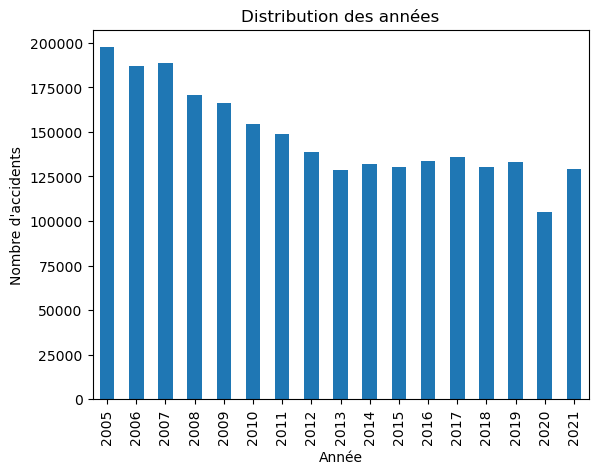

In [22]:
# Le nbre d'accidents par chaque année
counts = usag['annee'].value_counts()

# Tri par année
counts = counts.sort_index()

# Distribution des années sous forme de graphe
counts.plot(kind='bar')

plt.title('Distribution des années')
plt.xlabel('Année')
plt.ylabel("Nombre d'accidents")

plt.show();

**Place**

Permet de situer la place occupée dans le véhicule par l'usager au moment de l'accident. 
La place dépends du type de véhicule : moto/side car, voiture ou transport en commun
Le détail est donné par l’illustration ci-dessous :

In [23]:
# Renvoie du type d'objets de la colonne place
usag.place.dtypes

dtype('float64')

In [24]:
usag.place.unique()

array([ 1.,  2.,  4.,  5.,  3.,  0.,  8.,  9.,  7.,  6., nan, 10., -1.])

In [25]:
# Convert situ from float to category
usag.place = usag.place.astype('category')
# Write an assert statement confirming the change
assert usag.place.dtype == 'category'

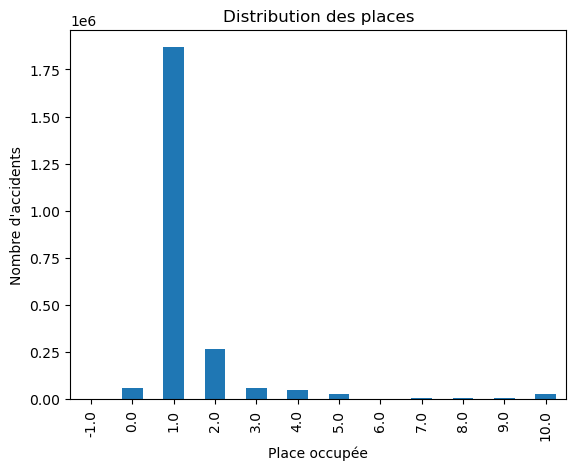

In [26]:
# Le nbre d'accidents par place occupée par l'usager
counts = usag['place'].value_counts()

# Tri par place occupée
counts = counts.sort_index()

# Distribution des places occupées sous forme de graphe
counts.plot(kind='bar')

plt.title('Distribution des places')
plt.xlabel('Place occupée')
plt.ylabel("Nombre d'accidents")

plt.show()

<div class="alert alert-warning">Il semble intéressant d'analyser la place en fonction de la catégorie du véhicule : catv .</div>

**Catu** 

Catégorie d'usager :
 - 1 – Conducteur
 - 2 – Passager
 - 3 – Piéton

In [27]:
# Renvoie du type d'objets de la colonne catu
usag.catu.dtypes

dtype('int64')

In [28]:
usag.catu.unique()

array([1, 2, 3, 4])

In [29]:
# Convert catu from int to category
usag.catu = usag.catu.astype('category')
# Write an assert statement confirming the change
assert usag.catu.dtype == 'category'

In [30]:
usag.value_counts("catu")

catu
1    1867065
2     431895
3     207100
4       3560
dtype: int64

In [31]:
# Replace catagory number by category names
usag.catu.replace([1, 2, 3], 
                  ['Conducteur', 'Passager', 'Piéton'],
                 inplace=True)

In [32]:
usag.value_counts("catu")

catu
Conducteur    1867065
Passager       431895
Piéton         207100
4                3560
dtype: int64

In [33]:
usag.catu.replace([4], [np.nan], inplace=True)

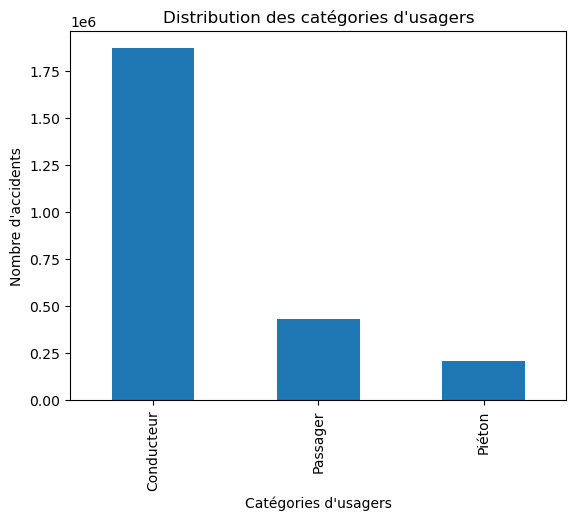

In [34]:
# Le nbre d'accidents par catégorie d'usager
counts = usag['catu'].value_counts()

# Tri par catégorie d'usager
counts = counts.sort_index()

# Distribution des catégories d'usager sous forme de graphe
counts.plot(kind='bar')

# Set text labels and properties.
#plt.xticks([1, 2, 3, 4], ['Conducteur(1)', 'Passager(2)', 'Piéton(3)', '4'])  
plt.title("Distribution des catégories d'usagers")
plt.xlabel("Catégories d'usagers")
plt.ylabel("Nombre d'accidents")

plt.show()

**grav**

Gravité de blessure de l'usager, les usagers accidentés sont classés en trois catégories de victimes plus les indemnes :
 - 1 – Indemne
 - 2 – Tué
 - 3 – Blessé hospitalisé
 - 4 – Blessé léger

In [35]:
# Renvoie du type d'objets de la colonne grav
display(usag.grav.dtypes)
display(usag.grav.unique())

dtype('int64')

array([ 4,  3,  1,  2, -1])

In [36]:
# Convert grav from int to category
usag.grav = usag.grav.astype('category')
# Write an assert statement confirming the change
assert usag.grav.dtype == 'category'

In [37]:
# Replace catagory number by category names
usag.grav.replace([1, 2, 3, 4], 
                  ['Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger'],
                 inplace=True)

In [38]:
usag.value_counts("grav", dropna=False, normalize=True)*100

grav
Indemne               41.005451
Blessé léger          36.334266
Blessé hospitalisé    19.985057
Tué                    2.672835
-1                     0.002391
dtype: float64

In [39]:
usag['grav'].cat.categories

Index([-1, 'Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger'], dtype='object')

In [40]:
usag['grav'] = usag['grav'].cat.reorder_categories(
  new_categories=['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué', -1], 
  ordered=True
)

In [41]:
usag['grav'].cat.categories

Index(['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué', -1], dtype='object')

In [42]:
usag.value_counts("grav")

grav
Indemne               1029081
Blessé léger           911852
Blessé hospitalisé     501549
Tué                     67078
-1                         60
dtype: int64

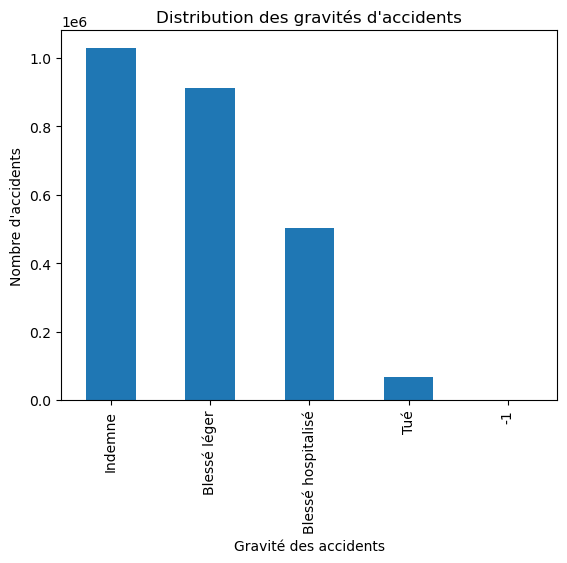

In [43]:
# Le nbre d'accidents par niveau de gravité
counts = usag['grav'].value_counts()

# Tri par gravité d'accident
counts = counts.sort_index()

#plt.figure(figsize=(9, 9))
# Distribution des gravités d'accident sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution des gravités d'accidents")
plt.xlabel("Gravité des accidents")
plt.ylabel("Nombre d'accidents")

plt.show()

**sexe**

Sexe de l'usager :
 - 1 – Masculin
 - 2 – Féminin

In [44]:
# Renvoie du type d'objets de la colonne sexe
usag.sexe.dtypes

dtype('int64')

In [45]:
# Convert sexe from int to category
usag.sexe = usag.sexe.astype('category')
# Write an assert statement confirming the change
assert usag.sexe.dtype == 'category'

In [46]:
# Renvoie les valeurs uniques
display(usag.sexe.unique())

[1, 2, -1]
Categories (3, int64): [-1, 1, 2]

In [47]:
# Replace catagory number by category names
usag['sexe']= usag.sexe.replace([1, 2, -1], ['Masculin', 'Féminin', 'Non renseigné'])

In [48]:
usag.value_counts("sexe")

sexe
Masculin         1688356
Féminin           818202
Non renseigné       3062
dtype: int64

In [49]:
usag.value_counts("sexe", dropna=False, normalize=True).round(2)*100

sexe
Masculin         67.0
Féminin          33.0
Non renseigné     0.0
dtype: float64

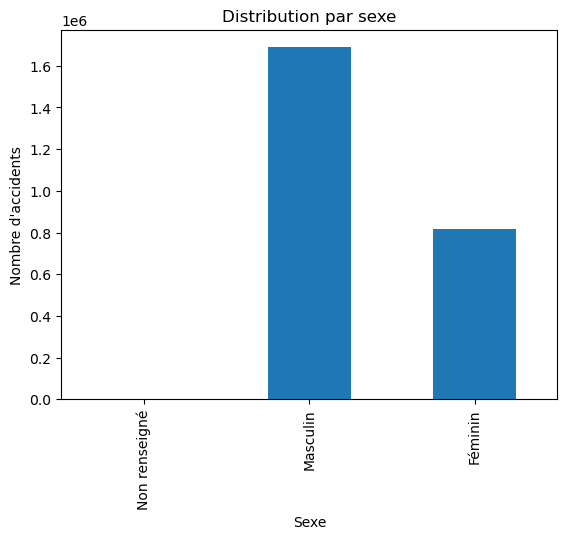

In [50]:
# Le nbre d'accidents par sexe
counts = usag['sexe'].value_counts()

# Tri par sexe
counts = counts.sort_index()

# Distribution des sexes sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'accidents")

plt.show()

**trajet**

Motif du déplacement au moment de l’accident :

 - -1 – Non renseigné
 - 0 – Non renseigné
 - 1 – Domicile – travail
 - 2 – Domicile – école
 - 3 – Courses – achats
 - 4 – Utilisation professionnelle
 - 5 – Promenade – loisirs
 - 9 – Autre

In [51]:
# Renvoie du type d'objets de la colonne trajet
display(usag.trajet.dtypes)
display(usag.trajet.unique())

dtype('float64')

array([ 1.,  3.,  0.,  5.,  9.,  4.,  2., nan, -1.])

In [52]:
# Convert trajet from float to category
usag.trajet = usag.trajet.astype('category')
# Write an assert statement confirming the change
assert usag.trajet.dtype == 'category'

In [53]:
usag.value_counts("trajet")

trajet
5.0     932128
0.0     701979
1.0     328622
4.0     244128
9.0     178874
3.0      67326
2.0      52043
-1.0      4026
dtype: int64

In [54]:
# Task 3: Les catégories non renseignées (-1 et 0) doivent-elles être regroupées ?

In [55]:
# Replace catagory number by category names
usag['trajet'] = usag.trajet.replace([-1, 0, 1, 2, 3, 4, 5, 9], 
                    ['Non renseigné', 'Non renseigné', 'Domicile – travail', 'Domicile – école', 
                     'Courses – achats', 'Utilisation professionnelle', 'Promenade – loisirs', 
                     'Autre'])

In [56]:
usag.value_counts("trajet", dropna=False, normalize=True)*100

trajet
Promenade – loisirs            37.149509
Non renseigné                  28.137487
Domicile – travail             13.097070
Utilisation professionnelle     9.729603
Autre                           7.128937
Courses – achats                2.683245
Domicile – école                2.074149
dtype: float64

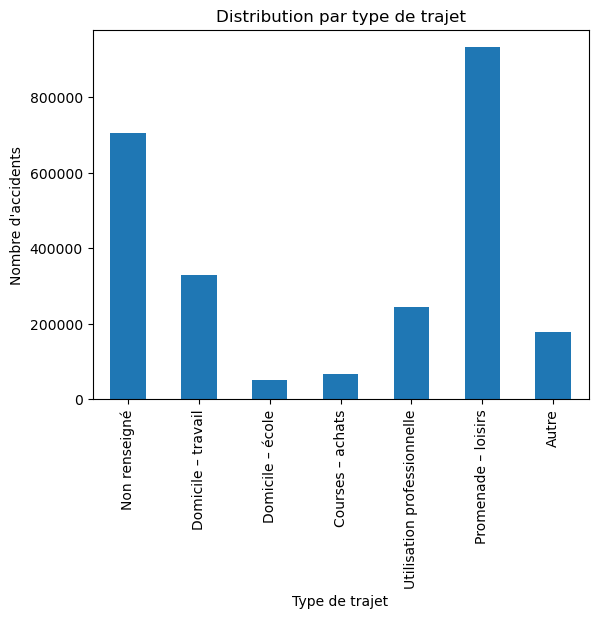

In [57]:
# Le nbre d'accidents par trajet
counts = usag['trajet'].value_counts()

# Tri par trajet
counts = counts.sort_index()

# Distribution des types de trajet sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par type de trajet")
plt.xlabel("Type de trajet")
plt.ylabel("Nombre d'accidents")

plt.show()

<div class="alert alert-info">Les équipements de sécurité jusqu’en 2018 étaient en 2 variables : existence et utilisation.
A partir de 2019, il s’agit de l’utilisation avec jusqu’à 3 équipements possibles pour un même usager
(notamment pour les motocyclistes dont le port du casque et des gants est obligatoire).</div>

In [58]:
# Task 4 : Préciser définition des champs : secu, secu1, secu2, secu3

In [59]:
# Renvoie du type d'objets de la colonne trajet
display(usag.secu.dtypes)
display(usag.secu.unique())

dtype('float64')

array([11., 31., 21.,  0., 12., 13., 90., 10., 22., 91., 33., 41., 23.,
       20., 92., 32., 43., 93., 42.,  1., nan, 30., 40.,  3.,  2.])

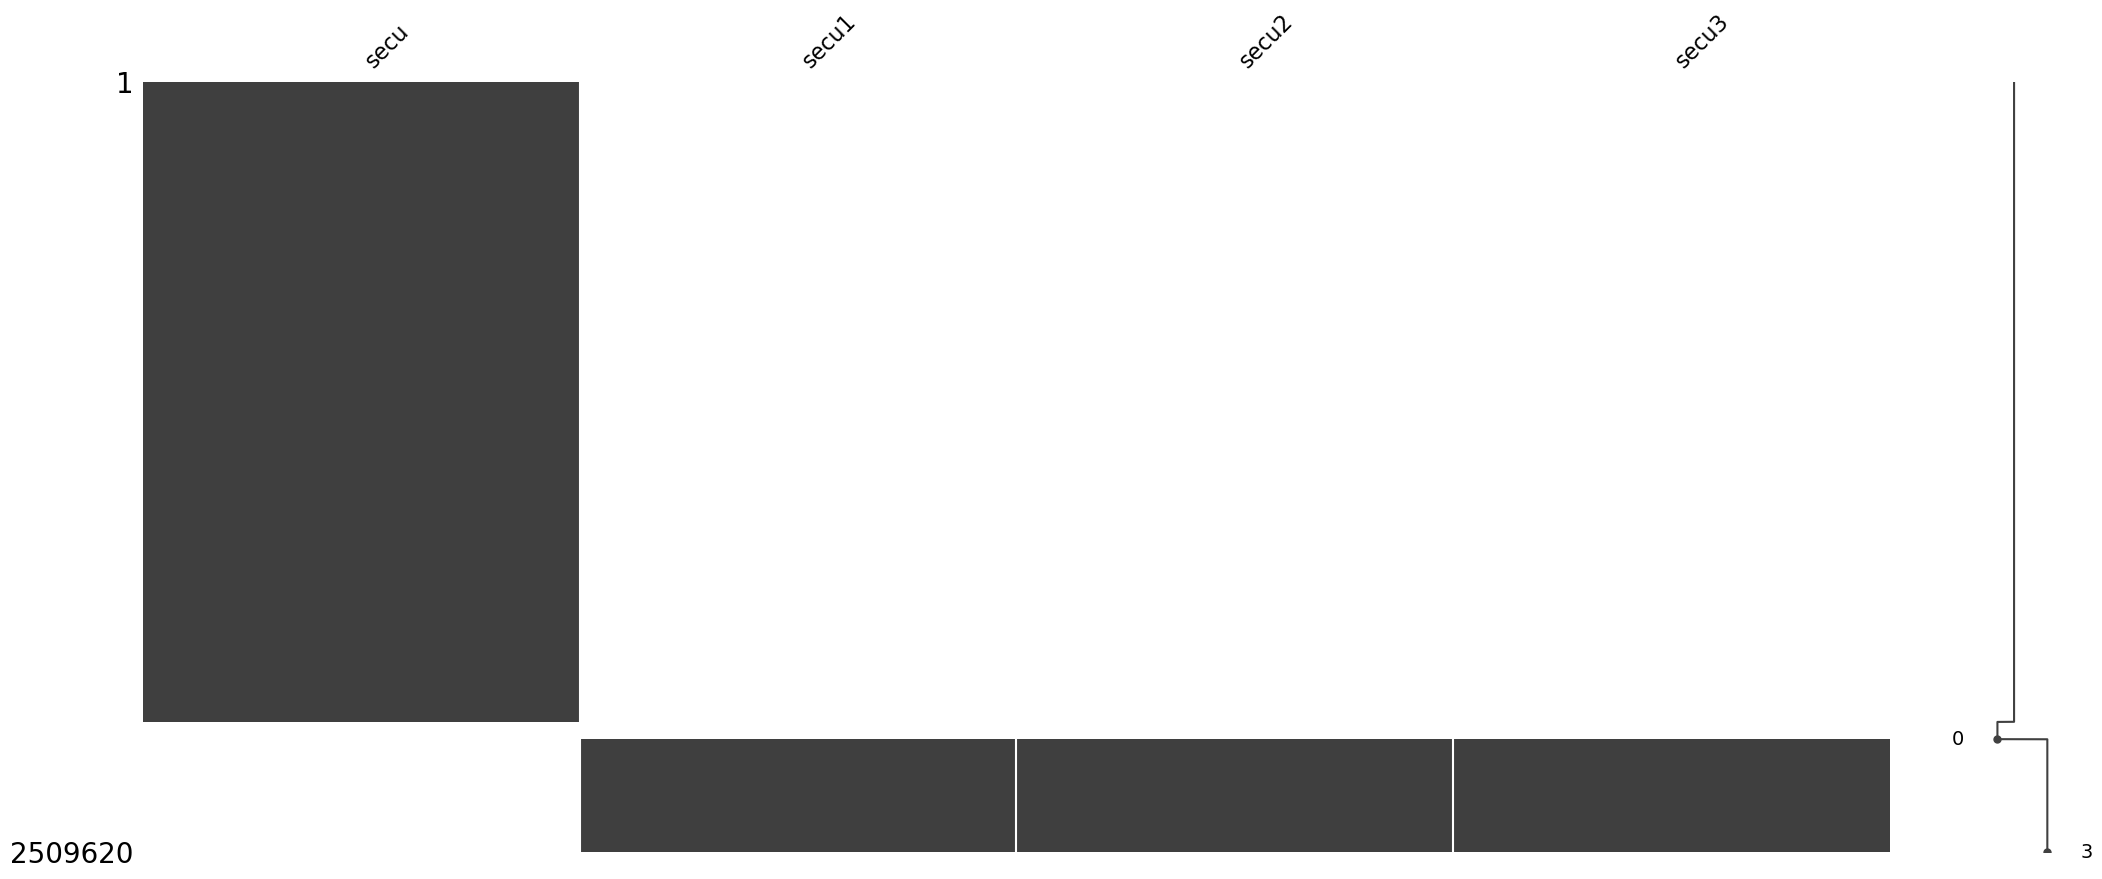

In [60]:
## Plot nullity matrix of lieux sorted by column 'secu' values
fig = msno.matrix(usag[['secu', 'secu1', 'secu2', 'secu3']].sort_values("secu"))

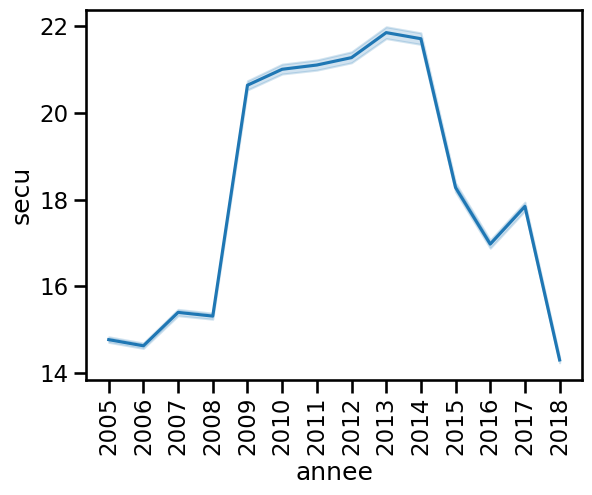

In [61]:
sns.set_context("talk")
sns.lineplot(data=usag, x="annee", y="secu")
plt.xticks(rotation='vertical');

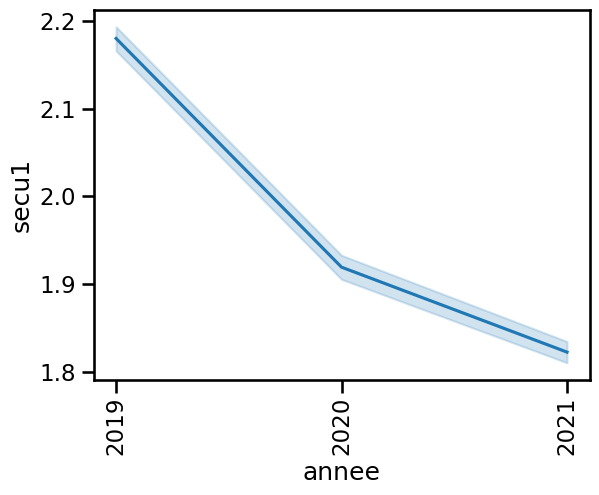

In [62]:
sns.lineplot(data=usag, x="annee", y="secu1")
plt.xticks(rotation='vertical');

In [63]:
usag['secu'].astype(str).str[0]

0          1
1          1
2          1
3          3
4          1
          ..
2509615    n
2509616    n
2509617    n
2509618    n
2509619    n
Name: secu, Length: 2509620, dtype: object

In [64]:
usag['secu'].astype(str).str[1].head()

0    1
1    1
2    1
3    1
4    1
Name: secu, dtype: object

In [65]:
(usag['secu'].isna().sum()/len(usag)).round(2)

0.17

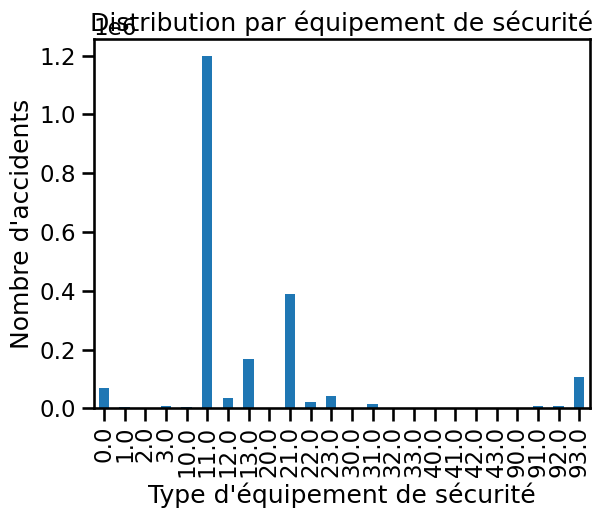

In [66]:
# Le nbre d'accidents par équipements de sécurité utilisés
counts = usag['secu'].value_counts()

# Tri par équipement de sécurité
counts = counts.sort_index()

# Distribution des équipements de sécurité sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par équipement de sécurité")
plt.xlabel("Type d'équipement de sécurité")
plt.ylabel("Nombre d'accidents")

plt.show()

In [67]:
# Liste des valeurs pour la colonne "secu" :
unique_values = usag['secu'].unique()
print(unique_values)


[11. 31. 21.  0. 12. 13. 90. 10. 22. 91. 33. 41. 23. 20. 92. 32. 43. 93.
 42.  1. nan 30. 40.  3.  2.]


In [68]:
# Nbre de valeurs différentes pour la colonne "secu" :
unique_values_number = usag['secu'].nunique()
print(unique_values_number)

24


**secu1**

Le renseignement du caractère indique la présence et l’utilisation de l’équipement de sécurité :
 - -1 – Non renseigné
 - 0 – Aucun équipement
 - 1 – Ceinture
 - 2 – Casque
 - 3 – Dispositif enfants
 - 4 – Gilet réfléchissant
 - 5 – Airbag (2RM/3RM)
 - 6 – Gants (2RM/3RM)
 - 7 – Gants + Airbag (2RM/3RM)
 - 8 – Non déterminable
 - 9 – Autre

In [69]:
# Renvoie du type d'objets de la colonne trajet
display(usag.secu1.dtypes)
display(usag.secu2.dtypes)
display(usag.secu3.dtypes)

dtype('float64')

dtype('float64')

dtype('float64')

In [70]:
# conversion tmporaire en STR
usag['secuUn'] = usag['secu1'].astype(str)
usag['secuDeux'] = usag['secu2'].astype(str)

In [71]:
# Renvoie du type d'objets de la colonne trajet
display(usag.secuUn.dtypes)
display(usag.secuDeux.dtypes)

dtype('O')

dtype('O')

In [72]:
usag['secu1'].unique()

array([nan,  1.,  2.,  8.,  0.,  3.,  4.,  5.,  6.,  9., -1.,  7.])

In [73]:
# Check if the value is not NA then do the conversion and subsetting. – 
# numpy.where(condition, [x, y, ]/) Where True, yield x, otherwise yield y.
np.where(usag["secu"].isna(), usag['secu1'].astype(str).str[0], usag['secu'].astype(str).str[0]) 

array(['1', '1', '1', ..., '0', '1', '1'], dtype=object)

In [74]:
usag['secuUn'] = np.where(usag["secu"].isna(), usag['secu1'].astype(str).str[0], usag['secu'].astype(str).str[0]) 

In [75]:
usag['secuUn'].head()

0    1
1    1
2    1
3    3
4    1
Name: secuUn, dtype: object

In [76]:
# Liste des valeurs pour la colonne "secuUn" :
usag['secuUn'].unique()

array(['1', '3', '2', '0', '9', '4', 'n', '8', '5', '6', '-', '7'],
      dtype=object)

In [77]:
# Liste des valeurs pour la colonne "secu1" :
usag['secu1'].unique()

array([nan,  1.,  2.,  8.,  0.,  3.,  4.,  5.,  6.,  9., -1.,  7.])

In [78]:
usag['secu'].astype(str).str[0].unique()

array(['1', '3', '2', '0', '9', '4', 'n'], dtype=object)

In [79]:
# Replace catagory number by category names
usag.secuUn.replace(['n', '-'], [np.nan, '-1'], inplace=True)

In [80]:
# Liste des valeurs pour la colonne "secu1" :
usag['secuUn'].unique()

array(['1', '3', '2', '0', '9', '4', nan, '8', '5', '6', '-1', '7'],
      dtype=object)

In [81]:
# Convert secu1 from float to category
usag.secuUn = usag.secuUn.astype('category')
# Write an assert statement confirming the change
assert usag.secuUn.dtype == 'category'

In [82]:
# Replace catagory number by category names
usag['secuUn'] = usag.secuUn.replace(['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 
                   ['Non renseigné', 'Aucun équipement', 'Ceinture', 'Casque', 'Dispositif enfants',
                   'Gilet réfléchissant', 'Airbag (2RM/3RM)', 'Gants (2RM/3RM)', 
                    'Gants + Airbag (2RM/3RM)', 'Non déterminable', 'Autre'])

In [83]:
usag.value_counts("secuUn", dropna=False, normalize=True)*100

secuUn
Ceinture                    66.375170
Casque                      21.394140
Autre                        4.930938
Aucun équipement             3.969006
Non déterminable             1.833937
Dispositif enfants           1.087366
Gilet réfléchissant          0.270109
Non renseigné                0.118708
Gants (2RM/3RM)              0.012311
Airbag (2RM/3RM)             0.007908
Gants + Airbag (2RM/3RM)     0.000408
dtype: float64

In [84]:
# pourcentage de valeurs maquantes
(usag.secuUn.isna().sum()/len(usag)).round(2)

0.02

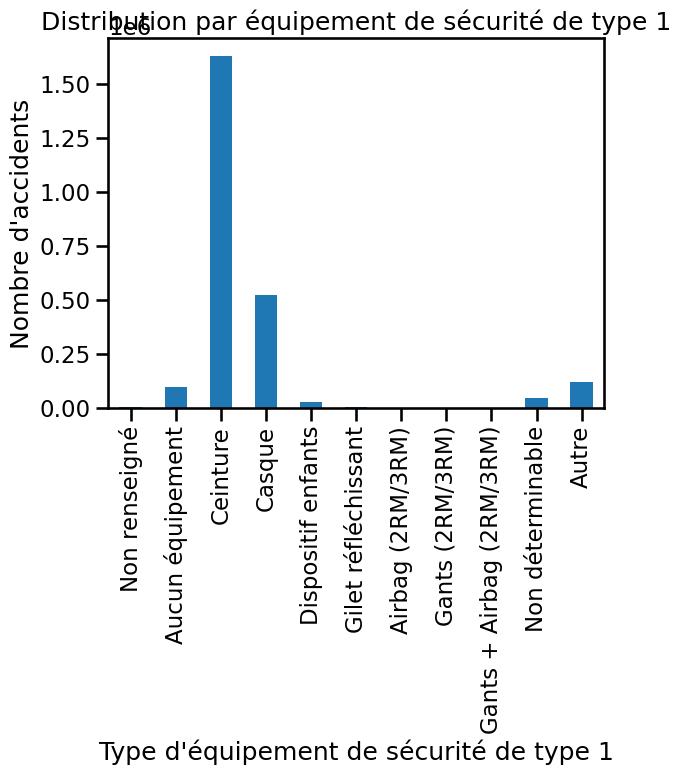

In [85]:
# Le nbre d'accidents par équipements de sécurité utilisés de type 1
counts = usag['secuUn'].value_counts()

# Tri par équipement de sécurité de type 1
counts = counts.sort_index()

# Distribution des équipements de sécurité de type 1 sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par équipement de sécurité de type 1")
plt.xlabel("Type d'équipement de sécurité de type 1")
plt.ylabel("Nombre d'accidents")

plt.show()

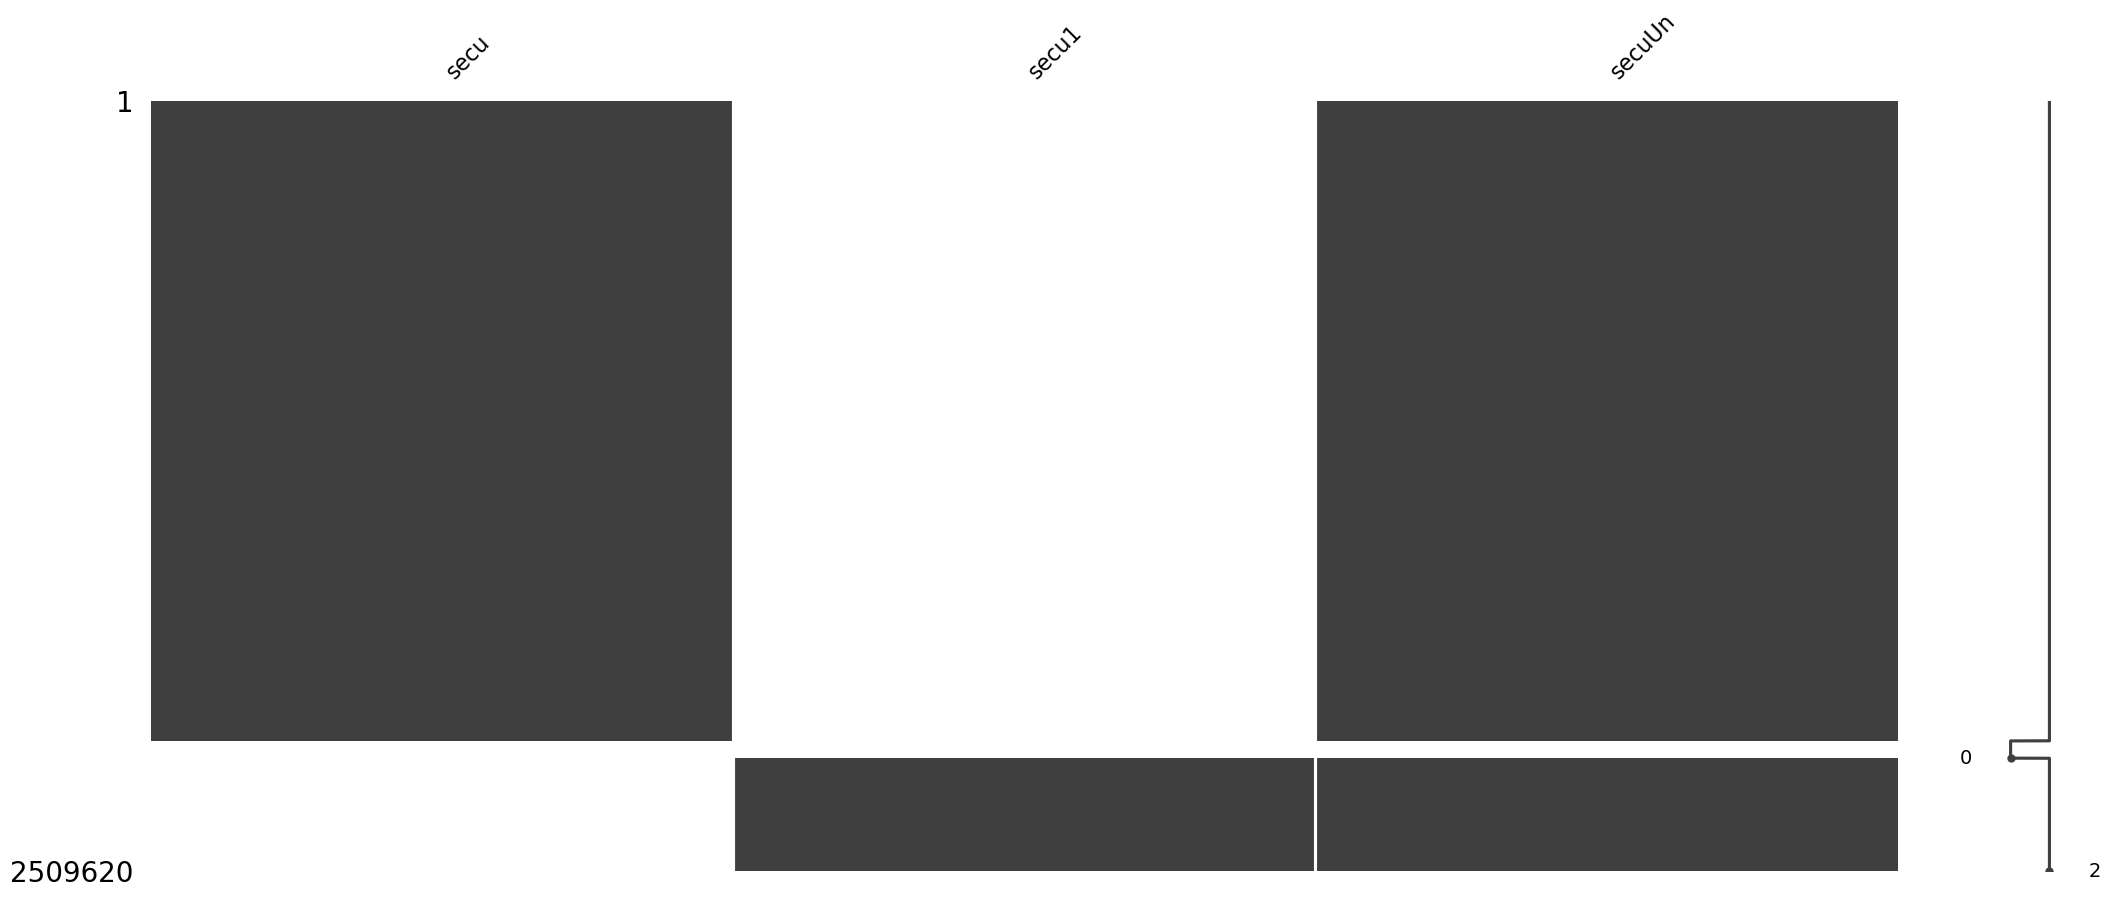

In [86]:
## Plot nullity matrix of lieux sorted by column 'secu' values
fig = msno.matrix(usag[['secu', 'secu1', 'secuUn']].sort_values("secu"))

**secu2**

Le renseignement du caractère indique la présence et l’utilisation de l’équipement de sécurité :
 - -1 – Non renseigné
 - 0 – Aucun équipement
 - 1 – Ceinture
 - 2 – Casque
 - 3 – Dispositif enfants
 - 4 – Gilet réfléchissant
 - 5 – Airbag (2RM/3RM)
 - 6 – Gants (2RM/3RM)
 - 7 – Gants + Airbag (2RM/3RM)
 - 8 – Non déterminable
 - 9 – Autre

In [87]:
# Liste des valeurs pour la colonne "secu2" :
unique_values = usag['secu2'].unique()
print(unique_values)

[nan  0.  8.  6. -1.  7.  4.  9.  5.  2.  3.  1.]


In [88]:
usag['secu'].unique()

array([11., 31., 21.,  0., 12., 13., 90., 10., 22., 91., 33., 41., 23.,
       20., 92., 32., 43., 93., 42.,  1., nan, 30., 40.,  3.,  2.])

In [89]:
usag['secu'].astype(str).str[1].unique()

array(['1', '.', '2', '3', '0', 'a'], dtype=object)

In [90]:
np.where(usag["secu"].isna(), usag['secu2'].astype(str).str[0], usag['secu'].astype(str).str[1]) 

array(['1', '1', '1', ..., '-', '0', '0'], dtype=object)

In [91]:
usag['secuDeux'] = np.where(usag["secu"].isna(), usag['secu2'].astype(str).str[0], usag['secu'].astype(str).str[1]) 
usag['secuDeux'].head()

0    1
1    1
2    1
3    1
4    1
Name: secuDeux, dtype: object

In [92]:
# Liste des valeurs pour la colonne "secuDeux" :
usag['secuDeux'].unique()

array(['1', '.', '2', '3', '0', 'n', '8', '6', '-', '7', '4', '9', '5'],
      dtype=object)

In [93]:
# Replace catagory number by category names
usag.secuDeux.replace(['.', 'n', '-'], ['-1', np.nan, '-1'], inplace=True)

In [94]:
# Liste des valeurs pour la colonne "secuDeux" :
usag['secuDeux'].unique()

array(['1', '-1', '2', '3', '0', nan, '8', '6', '7', '4', '9', '5'],
      dtype=object)

In [95]:
# Convert secu2 from float to category
usag.secuDeux = usag.secuDeux.astype('category')
# Write an assert statement confirming the change
assert usag.secuDeux.dtype == 'category'

In [96]:
# Replace catagory number by category names
usag['secuDeux'] =  usag.secuDeux.replace(['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 
                   ['Non renseigné', 'Aucun équipement', 'Ceinture', 'Casque', 'Dispositif enfants',
                   'Gilet réfléchissant(4)', 'Airbag (2RM/3RM)(5)', 'Gants (2RM/3RM)(6)', 
                    'Gants + Airbag (2RM/3RM)', 'Non déterminable', 'Autre'])

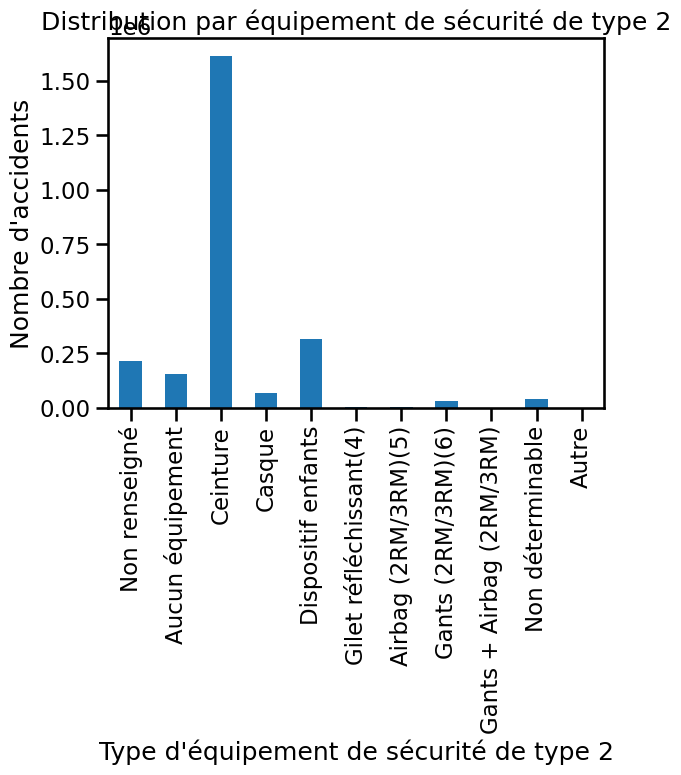

In [97]:
# Le nbre d'accidents par équipements de sécurité utilisés de type 2
counts = usag['secuDeux'].value_counts()

# Tri par équipement de sécurité de type 2
counts = counts.sort_index()

# Distribution des équipements de sécurité de type 2 sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par équipement de sécurité de type 2")
plt.xlabel("Type d'équipement de sécurité de type 2")
plt.ylabel("Nombre d'accidents")

plt.show()

In [98]:
# pourcentage de valeurs maquantes
(usag.secuDeux.isna().sum()/len(usag)).round(2)

0.02

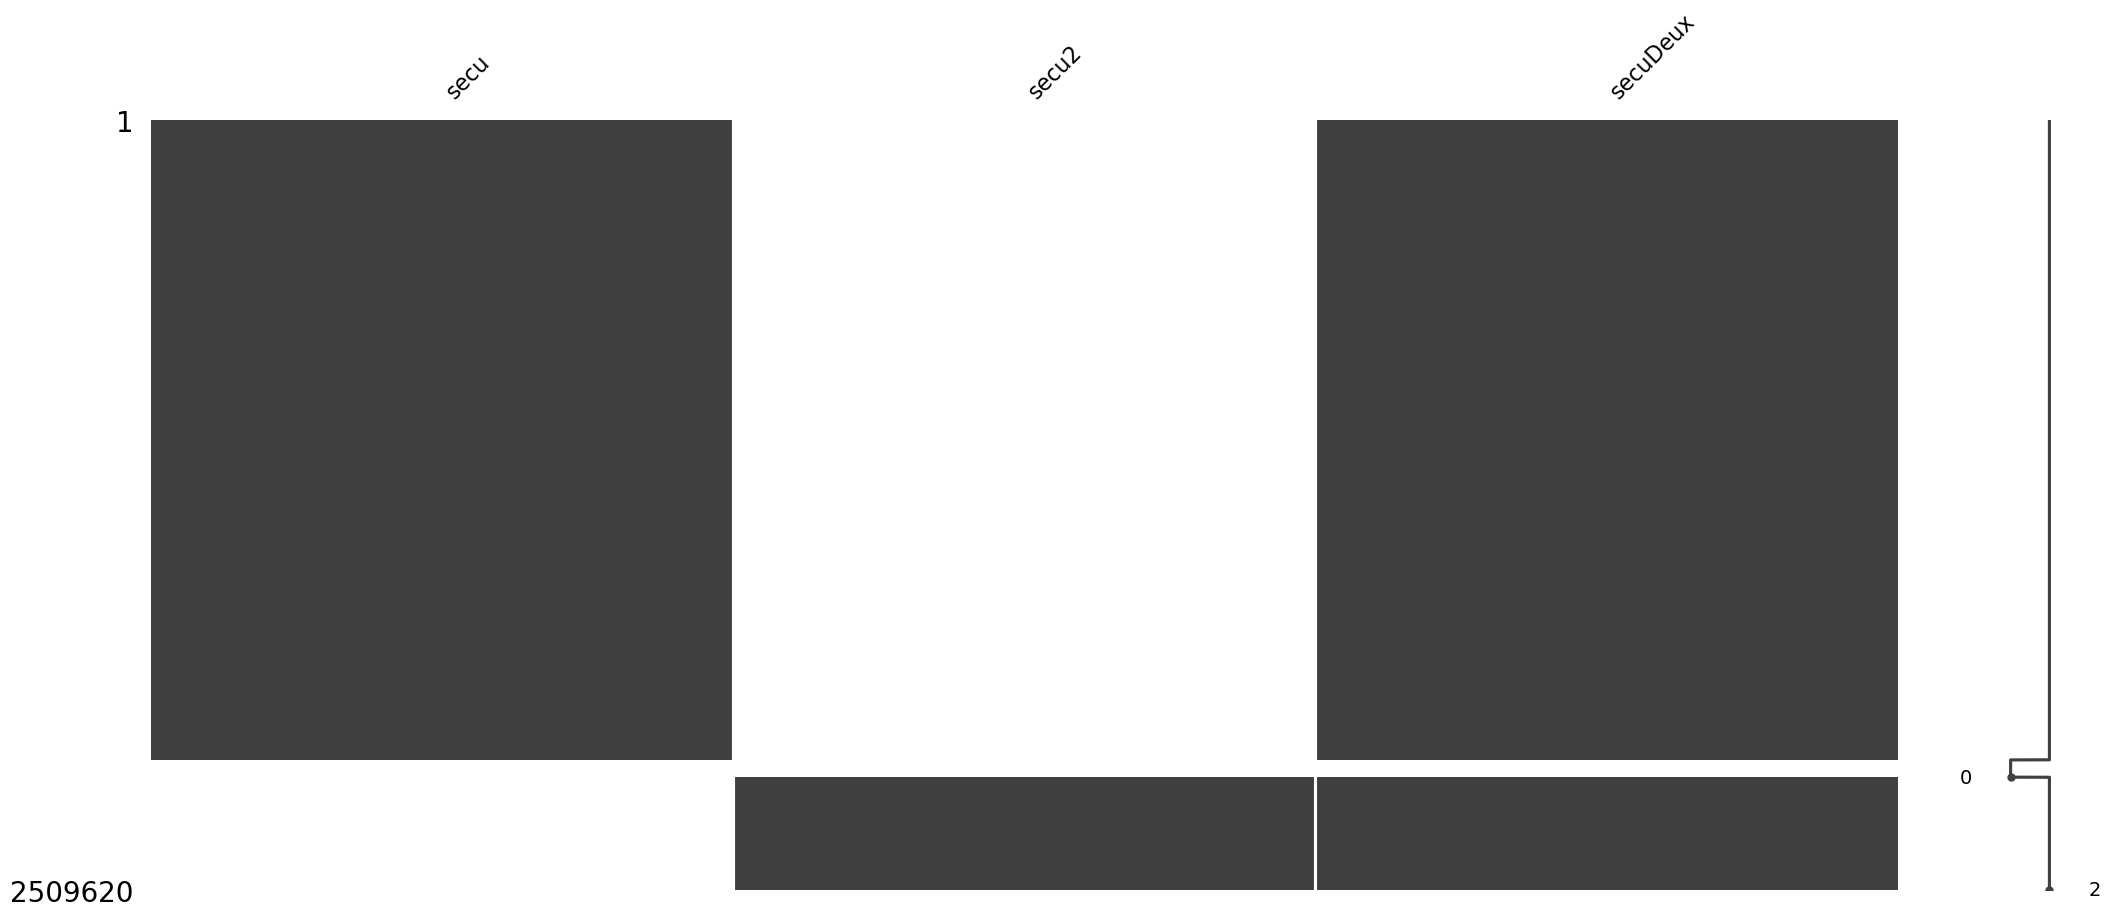

In [99]:
## Plot nullity matrix of lieux sorted by column 'secu' values
fig = msno.matrix(usag[['secu', 'secu2', 'secuDeux']].sort_values("secu"))

**secu3**

Le renseignement du caractère indique la présence et l’utilisation de l’équipement de sécurité :
 - -1 – Non renseigné
 - 0 – Aucun équipement
 - 1 – Ceinture
 - 2 – Casque
 - 3 – Dispositif enfants
 - 4 – Gilet réfléchissant
 - 5 – Airbag (2RM/3RM)
 - 6 – Gants (2RM/3RM)
 - 7 – Gants + Airbag (2RM/3RM)
 - 8 – Non déterminable
 - 9 – Autre

In [100]:
# Liste des valeurs pour la colonne "secu3" :
unique_values = usag['secu3'].unique()
print(unique_values)

[nan -1.  0.  9.  2.  4.  6.  1.  8.  5.  3.  7.]


In [101]:
# Convert secu3 from float to category
usag.secu3 = usag.secu3.astype('category')
# Write an assert statement confirming the change
assert usag.secu3.dtype == 'category'

In [102]:
# Replace catagory number by category names
usag['secuTrois'] = usag.secu3.replace([-1, 0, 1, 2, 3, 4, 5, 6, 7 , 8, 9], 
                   ['Non renseigné', 'Aucun équipement', 'Ceinture', 'Casque', 'Dispositif enfants',
                   'Gilet réfléchissant', 'Airbag (2RM/3RM)', 'Gants (2RM/3RM)', 
                    'Gants + Airbag (2RM/3RM)', 'Non déterminable(8)', 'Autre'])

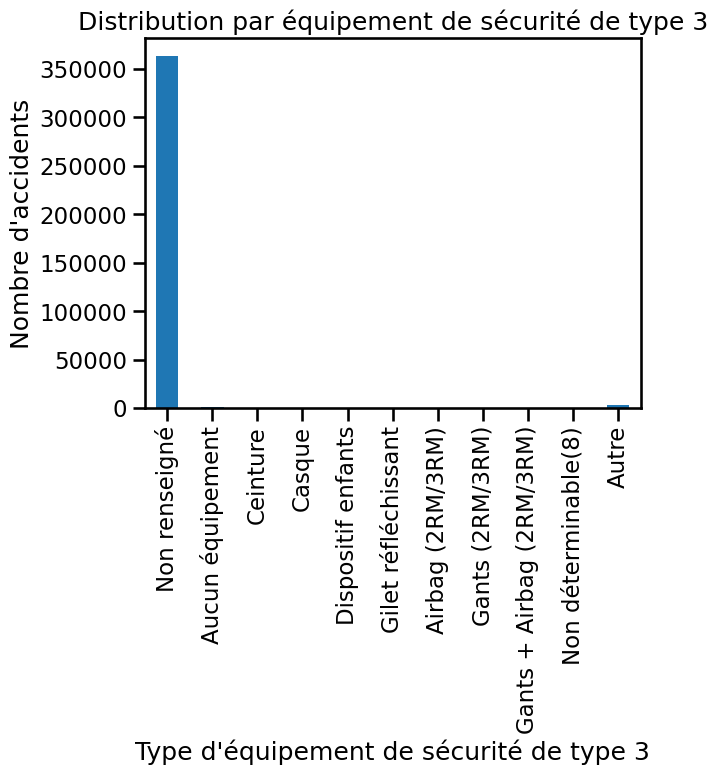

In [103]:
# Le nbre d'accidents par équipements de sécurité utilisés de type 3
counts = usag["secuTrois"].value_counts()

# Tri par équipement de sécurité de type 3
counts = counts.sort_index()

# Distribution des équipements de sécurité de type 3 sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par équipement de sécurité de type 3")
plt.xlabel("Type d'équipement de sécurité de type 3")
plt.ylabel("Nombre d'accidents")

plt.show()

In [104]:
usag.value_counts("secuTrois", normalize=True).round(2)

secuTrois
Non renseigné               0.99
Autre                       0.01
Aucun équipement            0.00
Gants (2RM/3RM)             0.00
Non déterminable(8)         0.00
Gilet réfléchissant         0.00
Ceinture                    0.00
Airbag (2RM/3RM)            0.00
Gants + Airbag (2RM/3RM)    0.00
Casque                      0.00
Dispositif enfants          0.00
dtype: float64

**locp**

Localisation du piéton :
 - -1 – Non renseigné
 - 0 – Sans objet
 - Sur chaussée :
     - 1 – A + 50 m du passage piéton
     - 2 – A – 50 m du passage piéton
 - Sur passage piéton :
     - 3 – Sans signalisation lumineuse
     - 4 – Avec signalisation lumineuse
 - Divers :
     - 5 – Sur trottoir
     - 6 – Sur accotement
     - 7 – Sur refuge ou BAU
     - 8 – Sur contre allée
     - 9 – Inconnue

In [105]:
# Renvoie du type d'objets de la colonne locp
display(usag.locp.dtypes)
display(usag.locp.unique())

dtype('float64')

array([ 0.,  2.,  4.,  1.,  5.,  6.,  3.,  8.,  7., nan, -1.,  9.])

In [106]:
# Convert locp from float to category
usag.locp = usag.locp.astype('category')
# Write an assert statement confirming the change
assert usag.locp.dtype == 'category'

In [107]:
# Replace catagory number by category names
usag['locp'] = usag.locp.replace([-1, 0, 1, 2, 3, 4, 5, 6, 7 , 8, 9], 
                  ['Non renseigné', 'Sans objet', 'Sur chaussée-A + 50 m du passage piéton', 
                   'Sur chaussée-A – 50 m du passage piéton',  'Sur passage piéton-Sans signalisation lumineuse',
                  'Sur passage piéton-Avec signalisation lumineuse', 'Sur trottoir', 'Sur accotement',
                  'Sur refuge ou BA', 'Sur contre allée', 'Inconnue'])

In [108]:
usag.value_counts("locp")

locp
Sans objet                                         2096517
Non renseigné                                       165644
Sur chaussée-A – 50 m du passage piéton              48472
Sur passage piéton-Avec signalisation lumineuse      47935
Sur passage piéton-Sans signalisation lumineuse      43199
Sur chaussée-A + 50 m du passage piéton              29933
Sur trottoir                                         13321
Sur accotement                                        4402
Sur contre allée                                      2229
Inconnue                                              1367
Sur refuge ou BA                                       240
dtype: int64

In [109]:
usag.value_counts("locp", normalize=True)*100

locp
Sans objet                                         85.458445
Non renseigné                                       6.751998
Sur chaussée-A – 50 m du passage piéton             1.975821
Sur passage piéton-Avec signalisation lumineuse     1.953931
Sur passage piéton-Sans signalisation lumineuse     1.760882
Sur chaussée-A + 50 m du passage piéton             1.220132
Sur trottoir                                        0.542992
Sur accotement                                      0.179435
Sur contre allée                                    0.090859
Inconnue                                            0.055722
Sur refuge ou BA                                    0.009783
dtype: float64

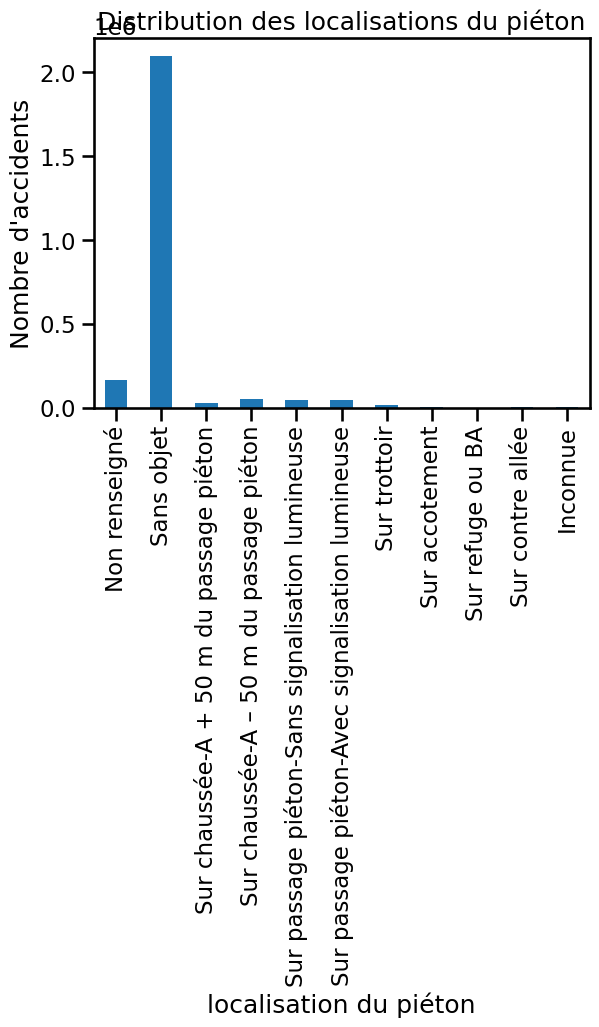

In [110]:
# Le nbre d'accidents par la localisation du piéton
counts = usag['locp'].value_counts()

# Tri par localisation du piéton
counts = counts.sort_index()

# Distribution des localisations du piéton sous forme de graphe
counts.plot(kind='bar')

plt.title('Distribution des localisations du piéton')
plt.xlabel('localisation du piéton')
plt.ylabel("Nombre d'accidents")

plt.show()

**etatp**

Cette variable permet de préciser si le piéton accidenté était seul ou non :
 - -1 – Non renseigné
 - 1 – Seul
 - 2 – Accompagné
 - 3 – En groupe

In [111]:
# Renvoie du type d'objets de la colonne etatp
display(usag.etatp.dtypes)
display(usag.etatp.unique())

dtype('float64')

array([ 0.,  2.,  1.,  3., nan, -1.])

In [112]:
# Convert etatp from float to category
usag.etatp = usag.etatp.astype('category')
# Write an assert statement confirming the change
assert usag.etatp.dtype == 'category'

In [113]:
# Replace catagory number by category names
usag['etatp']= usag.etatp.replace([-1, 0, 1, 2, 3], 
                   ['Non renseigné', 'Non renseigné', 'Seul', 'Accompagné', 'En groupe'])

In [114]:
usag.value_counts("etatp")

etatp
Non renseigné    2253797
Seul              151259
Accompagné         39595
En groupe           8551
dtype: int64

In [115]:
usag.value_counts("etatp", normalize=True).round(2)*100

etatp
Non renseigné    92.0
Seul              6.0
Accompagné        2.0
En groupe         0.0
dtype: float64

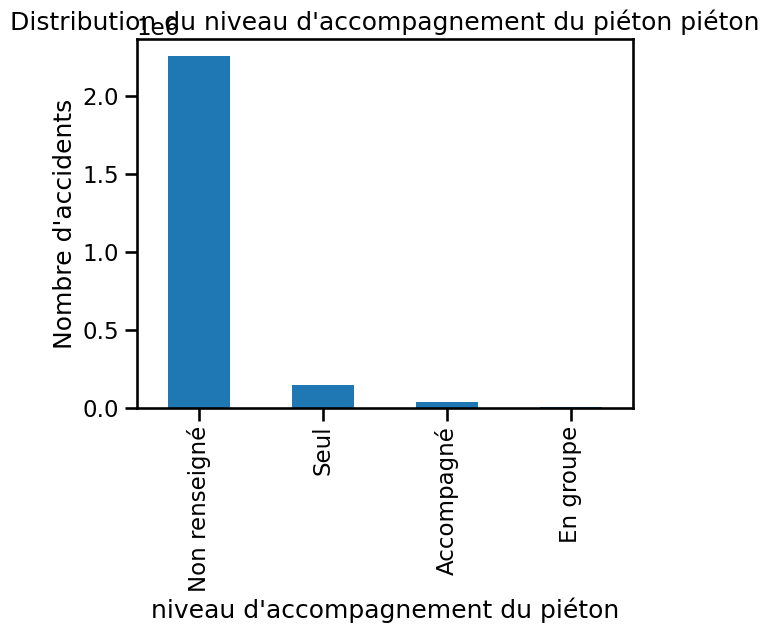

In [116]:
# Le nbre d'accidents en fonction du niveau d'accompagnement du piéton
counts = usag['etatp'].value_counts()

# Tri par niveau d'accompagnement du piéton
counts = counts.sort_index()

# Distribution du niveau d'accompagnement du piéton sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution du niveau d'accompagnement du piéton piéton")
plt.xlabel("niveau d'accompagnement du piéton")
plt.ylabel("Nombre d'accidents")

plt.show()

**actp**

Action du piéton :

 - -1 – Non renseigné
 - Se déplaçant
     - 0 – Non renseigné ou sans objet
     - 1 – Sens véhicule heurtant
     - 2 – Sens inverse du véhicule
 - Divers
     - 3 – Traversant
     - 4 – Masqué
     - 5 – Jouant – courant
     - 6 – Avec animal
     - 9 – Autre
     - A – Monte/descend du véhicule
     - B – Inconnue

In [117]:
# Renvoie du type d'objets de la colonne actp
display(usag.actp.dtypes)
display(usag.actp.unique())

dtype('O')

array(['0', '3', '1', '5', '2', '9', '6', '4', nan, ' -1', 'B', 'A', '8',
       '7'], dtype=object)

In [118]:
# Convert actp from float to category
usag.actp = usag.actp.astype('category')
# Write an assert statement confirming the change
assert usag.actp.dtype == 'category'

In [119]:
# Replace catagory number by category names
usag['actp'] = usag['actp'].replace([-1, 0, 1, 2, 3, 4, 5, 6, 7 , 8, 9], 
                  ['Non renseigné', 'Sans objet', 'Sens véhicule heurtant', 'Sens inverse du véhicule',  
                   'Traversant', 'Masqué', 'Jouant – courant', 'Avec animal', 'Autre', 'Monte/descend du véhicule',
                   'Inconnue'])

In [120]:
usag.value_counts("actp", normalize=True, dropna=False).round(2)*100

actp
0      86.0
3       6.0
 -1     6.0
9       1.0
1       0.0
5       0.0
2       0.0
4       0.0
B       0.0
6       0.0
A       0.0
8       0.0
7       0.0
dtype: float64

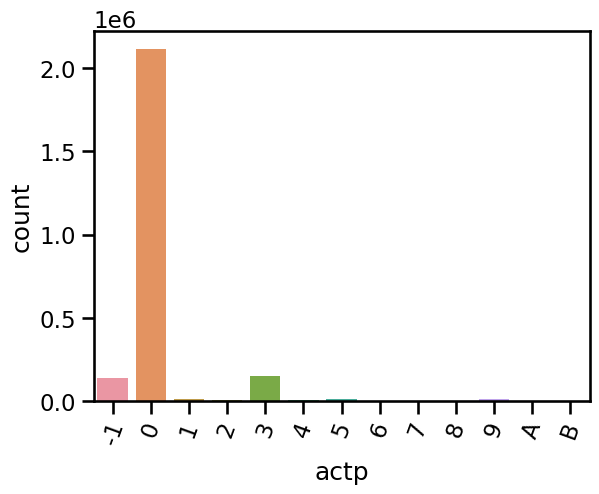

In [121]:
# Create count plot with vosp on the x-axis
sns.countplot(x='actp', data=usag)
plt.xticks(rotation=70)
# Show plot
plt.show()

**An_nais**

Année de naissance de l'usager.

In [122]:
# Renvoie du type d'objets de la colonne an_nais
display(usag.an_nais.dtypes)
display(usag.an_nais.unique())

dtype('float64')

array([1976., 1968., 1964., 2004., 1998., 1991., 1955., 1979., 1983.,
       1956., 1920., 1923., 1972., 1949., 1990., 1951., 1965., 1978.,
       1966., 1925., 1926., 1950., 1962., 1974., 1986., 1984., 1971.,
       1985., 1987., 1936., 1938., 1980., 1957., 1960., 1952., 1963.,
       1989., 1953., 1935., 1973., 1942., 1958., 1970., 1947., 1969.,
       1982., 1988., 1937., 1933., 1959., 1939., 1977., 1948., 1946.,
       1993., 1943., 1940., 1981., 1997., 1934., 1961., 1995., 1975.,
       1954., 1932., 2000., 1967., 1928., 1945., 1941., 1999., 2001.,
       1931., 1994., 1915., 1917., 1919., 1921., 1929., 2003., 1927.,
       1944., 1922., 1924.,   nan, 1916., 1930., 1992., 1918., 2002.,
       2005., 1996., 1914., 1913., 1901., 1909., 1912., 1898., 1911.,
       1906., 1910., 1900., 1905., 1902., 1897., 1907., 1896., 1908.,
       1903., 1904., 1899., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021.])

In [123]:
# converting the float to datetime format 
fmt = '%Y'
usag['an_nais'] = pd.to_datetime(usag['an_nais'], format=fmt)

In [124]:
type(usag['an_nais'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [125]:
# Create a datetime object d
usag['an_naiss'] = usag['an_nais'].dt.strftime(fmt)

In [126]:
 usag['an_nais'].value_counts(dropna=False, normalize=True)*100

1986-01-01    2.551024
1988-01-01    2.550585
1987-01-01    2.549191
1989-01-01    2.477626
1985-01-01    2.472805
                ...   
1897-01-01    0.000120
1899-01-01    0.000080
1902-01-01    0.000080
1904-01-01    0.000040
1896-01-01    0.000040
Name: an_nais, Length: 127, dtype: float64

In [127]:
usag.an_naiss.head()

0    1976
1    1968
2    1964
3    2004
4    1998
Name: an_naiss, dtype: object

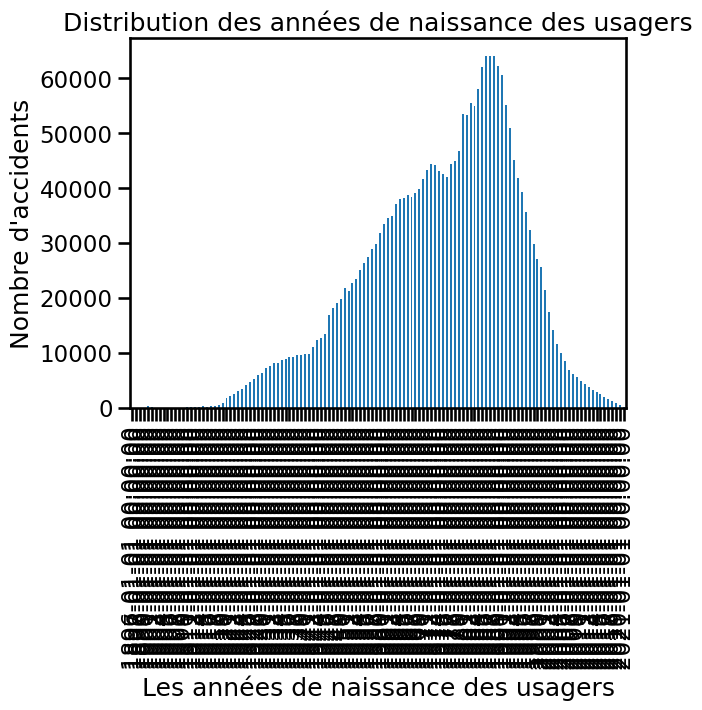

In [128]:
# Le nbre d'accidents en fonction de l'année de naissance de l'usager
counts = usag['an_nais'].value_counts()

# Tri par année de naissance de l'usager
counts = counts.sort_index()

# Distribution des années de naissance des usagers sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution des années de naissance des usagers")
plt.xlabel("Les années de naissance des usagers")
plt.ylabel("Nombre d'accidents")

plt.show()

In [129]:
counts = usag['an_naiss'].value_counts()
print(counts)

1986    64021
1988    64010
1987    63975
1989    62179
1985    62058
        ...  
1897        3
1899        2
1902        2
1904        1
1896        1
Name: an_naiss, Length: 126, dtype: int64


In [130]:
usag['annee'].dtypes

dtype('O')

In [131]:
usag['an_naiss'].dtypes

dtype('O')

In [132]:
usag['an_naiss'] = pd.to_datetime(usag['an_naiss'], format=fmt)

In [133]:
usag['an_naiss'][2]

Timestamp('1964-01-01 00:00:00')

In [134]:
usag['annee'] = pd.to_datetime(usag['annee'], format=fmt)

In [135]:
usag['annee'][2]

Timestamp('2005-01-01 00:00:00')

In [136]:
# Création d'une nouvelle colonne "age_acc" qui représenta l'âge d l'usager au moment de l'accident
usag['age_acc'] = usag['annee'] - usag['an_naiss']
usag['age_acc'].head()

0   10593 days
1   13515 days
2   14976 days
3     366 days
4    2557 days
Name: age_acc, dtype: timedelta64[ns]

In [137]:
usag['age_acc'].mean()

Timedelta('13740 days 08:00:32.582268672')

In [138]:
usag['age_acc'].median()

Timedelta('12419 days 00:00:00')

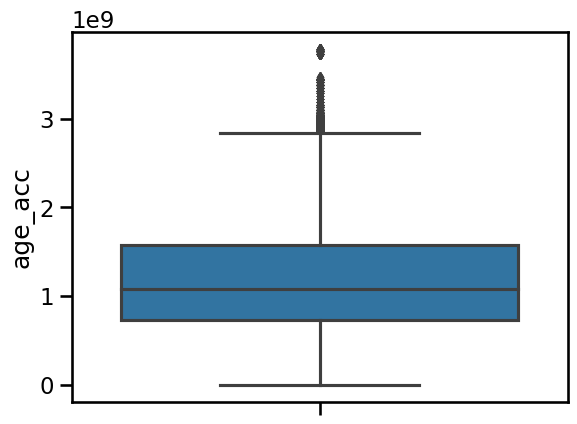

In [139]:
# By using the dt.total_seconds() method, we convert the timedelta values to numeric values 
# representing the total number of seconds in each duration
sns.boxplot(y=usag.age_acc.dt.total_seconds())
plt.show()

In [140]:
# Création d'une nouvelle colonne "age_accident" dans le dataframe "Usagers"
usag['age_acc_seconds'] = usag['age_acc'].dt.total_seconds()
usag['age_acc_seconds'].head()

0    9.152352e+08
1    1.167696e+09
2    1.293926e+09
3    3.162240e+07
4    2.209248e+08
Name: age_acc_seconds, dtype: float64

In [141]:
# Define the length of a year (in days)
days_per_year = 365

# Convert timedelta to years
years = usag['age_acc'] / pd.Timedelta(days=days_per_year)

# Print the resulting Series
print(years.head())

0    29.021918
1    37.027397
2    41.030137
3     1.002740
4     7.005479
Name: age_acc, dtype: float64


In [142]:
# age accident en années
usag['age_acc_an'] = usag['age_acc'] / pd.Timedelta(days=days_per_year)

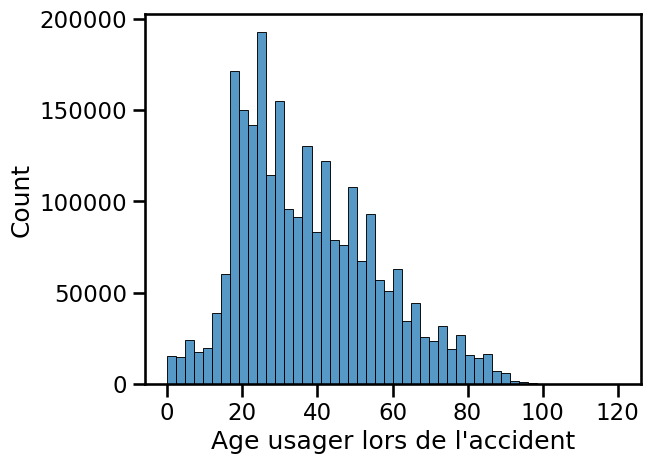

In [196]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag, x="age_acc_an", bins=50)
#plt.xlim(0, 10)
plt.xlabel("Age usager lors de l'accident")
# Show plot
plt.show();

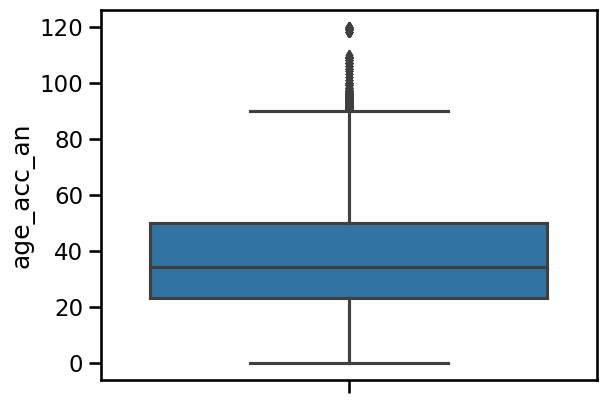

In [144]:
sns.boxplot(y=usag.age_acc_an)
plt.show()

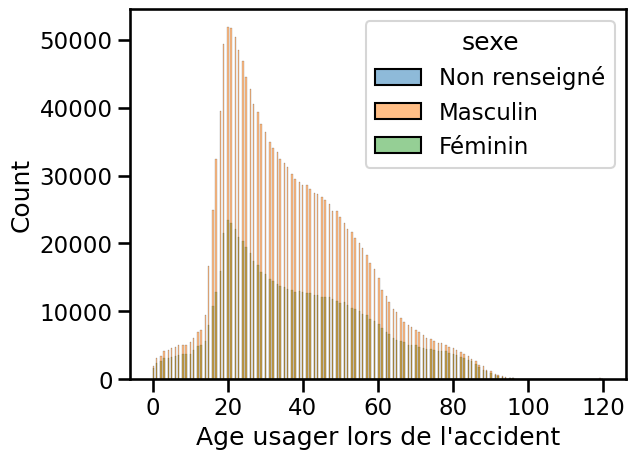

In [145]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag, x="age_acc_an", hue='sexe')
#plt.xlim(0, 10)
plt.xlabel("Age usager lors de l'accident")
# Show plot
plt.show();

In [146]:
# Le tableau croisé peut aider à identifier comment les observations se combinent.
# Cross-tabulate "Age de l'usager lors de l'accident" and "Sexe de l'usager"
pd.crosstab(usag['sexe'], usag['age_acc_an'], colnames=["Age de l'usager lors de l'accident"], 
            rownames=["Sexe de l'usager"])

Age de l'usager lors de l'accident,0.000000,1.000000,1.002740,2.000000,2.002740,3.000000,3.002740,4.002740,5.002740,5.005479,...,107.073973,108.071233,108.073973,109.071233,109.073973,109.076712,110.073973,118.079452,119.079452,120.079452
Sexe de l'usager,,,,,,,,,,,,,,,,,,,,,
Non renseigné,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Masculin,1964,2179,939,1656,1807,891,3300,4288,3209,1318,...,1,18,3,8,29,0,1,31,105,8
Féminin,1658,1693,748,1203,1505,645,2457,3120,2297,981,...,0,9,3,5,17,1,2,12,28,7


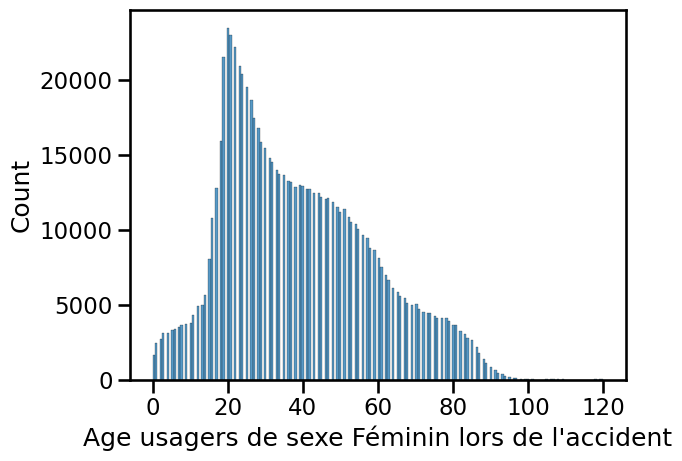

In [147]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag[usag['sexe'] == 'Féminin'], x="age_acc_an")
#plt.xlim(0, 10)
plt.xlabel("Age usagers de sexe Féminin lors de l'accident")
# Show plot
plt.show();

In [148]:
usag[usag['sexe'] == 'Féminin']["age_acc_an"].max()

120.07945205479452

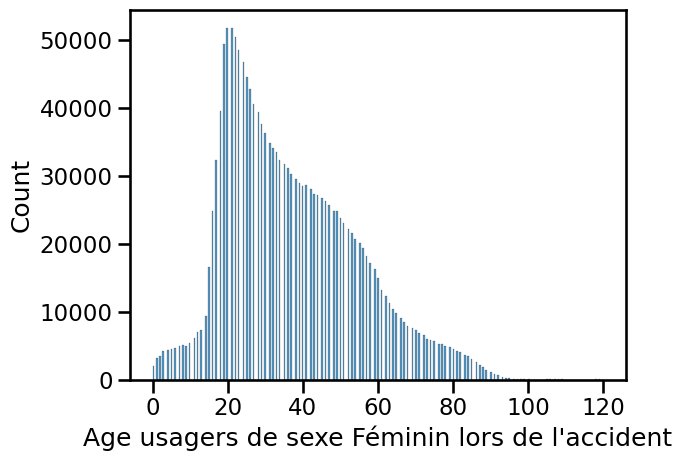

In [149]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag[usag['sexe'] == 'Masculin'], x="age_acc_an")
#plt.xlim(0, 10)
plt.xlabel("Age usagers de sexe Féminin lors de l'accident")
# Show plot
plt.show();

In [150]:
usag[usag['sexe'] == 'Masculin']["age_acc_an"].max()

120.07945205479452

In [151]:
usag['an_naiss'].min()

Timestamp('1896-01-01 00:00:00')

In [152]:
usag['an_naiss'].max()

Timestamp('2021-01-01 00:00:00')

In [153]:
# Cross-tabulate "Age de l'usager lors de l'accident" and "Sexe de l'usager"
pd.crosstab(usag['sexe'], usag['catu'], colnames=["Catégorie Usager"], 
            rownames=["Sexe de l'usager"])

Catégorie Usager,Conducteur,Passager,Piéton
Sexe de l'usager,,,
Non renseigné,3062,0,0
Masculin,1378338,207209,100512
Féminin,485665,224686,106588


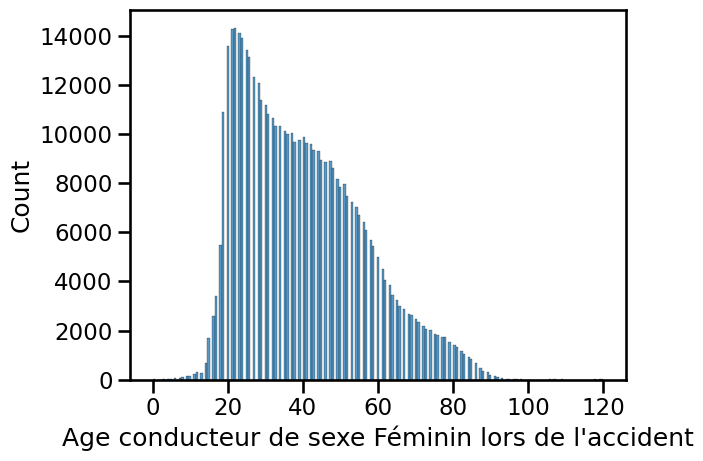

In [154]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag[(usag['sexe'] == 'Féminin') & (usag['catu'] == 'Conducteur')], x="age_acc_an")
#plt.xlim(0, 10)
plt.xlabel("Age conducteur de sexe Féminin lors de l'accident")
# Show plot
plt.show();

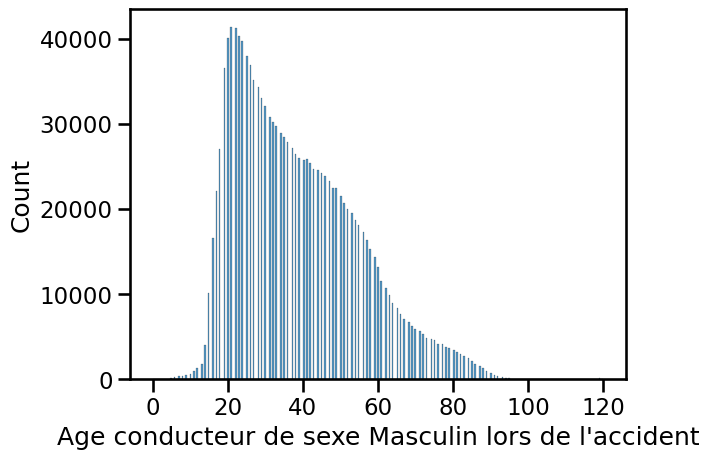

In [155]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag[(usag['sexe'] == 'Masculin') & (usag['catu'] == 'Conducteur')], x="age_acc_an")
#plt.xlim(0, 10)
plt.xlabel("Age conducteur de sexe Masculin lors de l'accident")
# Show plot
plt.show();

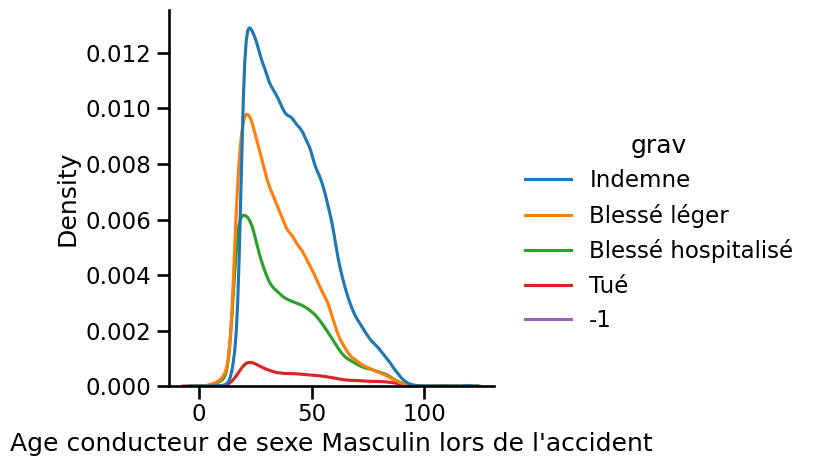

In [156]:
# Plot a histogram on age accident on the x-axis
sns.displot(data=usag[(usag['sexe'] == 'Masculin') & (usag['catu'] == 'Conducteur')], x="age_acc_an", 
             hue='grav', kind='kde')
#plt.xlim(0, 10)
plt.xlabel("Age conducteur de sexe Masculin lors de l'accident")
# Show plot
plt.show();

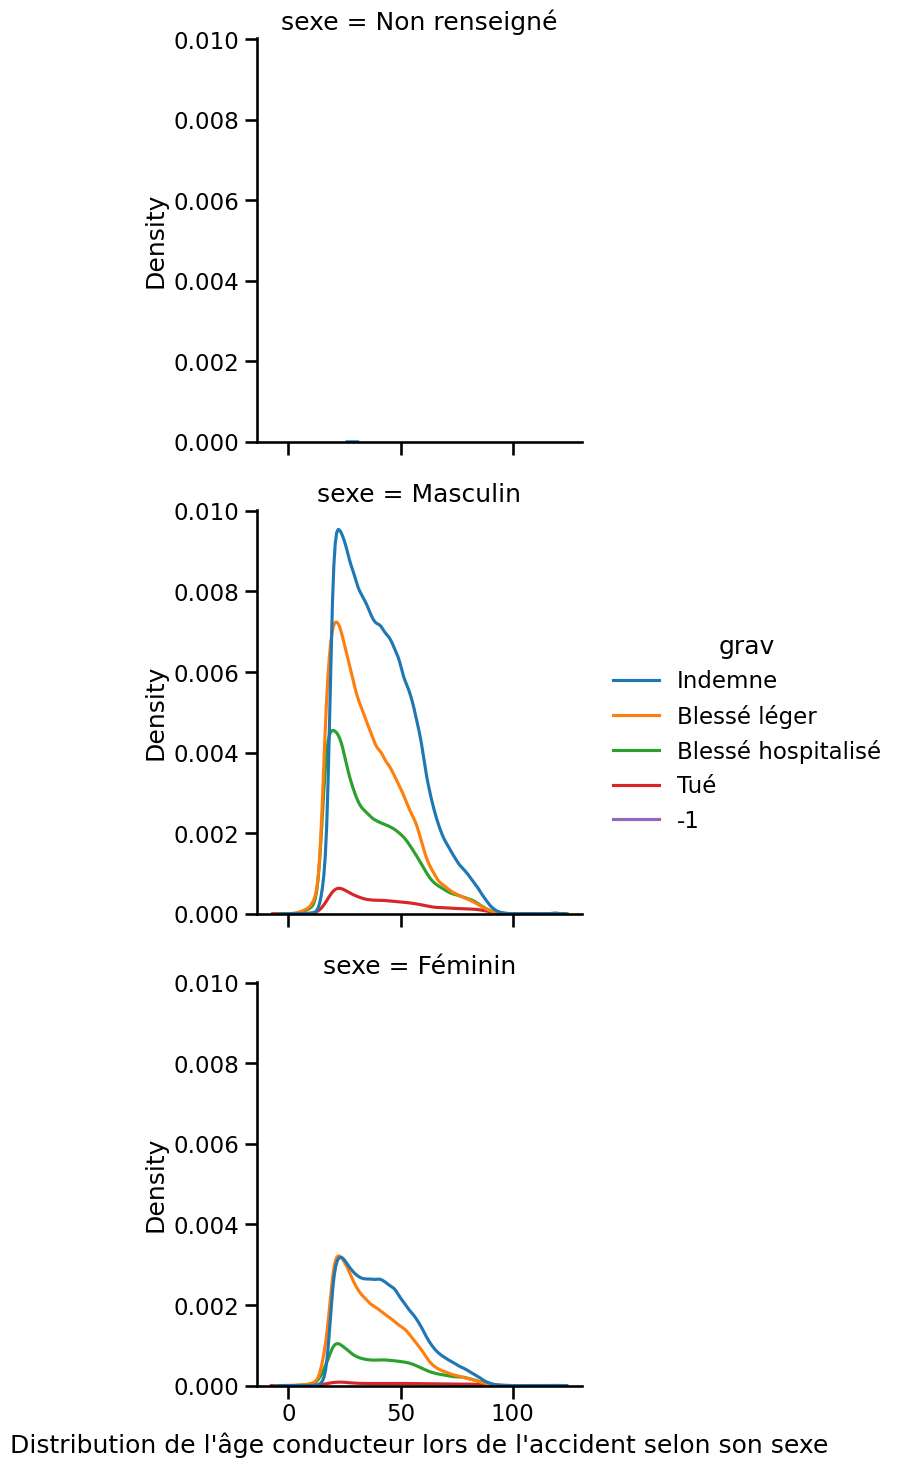

In [157]:
# Plot a histogram on age accident on the x-axis
sns.displot(data=usag[usag['catu'] == 'Conducteur'], x="age_acc_an", row='sexe',
             hue='grav', kind='kde')
#plt.xlim(0, 10)
plt.xlabel("Distribution de l'âge conducteur lors de l'accident selon son sexe")
# Show plot
plt.show();

In [158]:
usag.value_counts("age_acc_an", normalize=True, dropna=False).round(2)*100

age_acc_an
20.013699     3.0
24.016438     3.0
28.019178     2.0
19.013699     2.0
23.016438     2.0
             ... 
102.068493    0.0
110.073973    0.0
107.073973    0.0
109.076712    0.0
103.068493    0.0
Length: 197, dtype: float64

In [159]:
usag['age_acc_an'].describe()

count    2.504135e+06
mean     3.764475e+01
std      1.837574e+01
min      0.000000e+00
25%      2.301644e+01
50%      3.402466e+01
75%      5.003288e+01
max      1.200795e+02
Name: age_acc_an, dtype: float64

In [160]:
# gravite
usag.groupby('grav')['age_acc_an'].mean()

grav
Indemne               39.441871
Blessé léger          35.073611
Blessé hospitalisé    37.831349
Tué                   43.725480
-1                          NaN
Name: age_acc_an, dtype: float64

In [161]:
# regroupement par la durée : moyenne d'age exprimée en mois


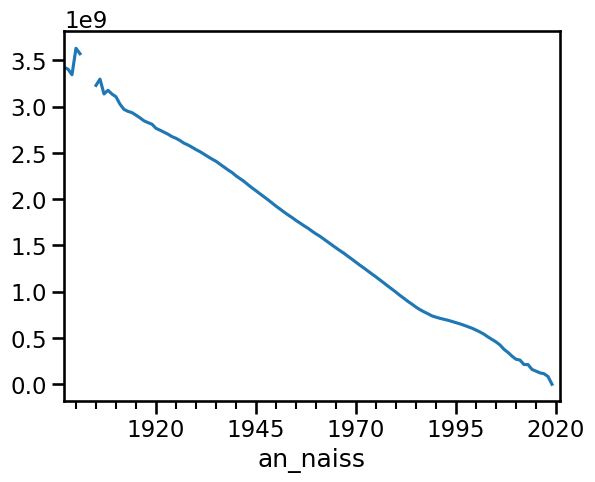

In [162]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample usag to daily, take the size, plot the results
usag[usag['catu'] == 'Conducteur'].resample('Y', on = 'an_naiss')['age_acc_seconds'].mean().plot()

# Show the results
plt.show()

In [163]:
print(pd.__version__)

1.4.4


In [164]:
usag.groupby('catu').size()

catu
Conducteur    1867065
Passager       431895
Piéton         207100
dtype: int64

In [165]:
usag.groupby('catu').first()

,Unnamed: 0,num_acc,place,grav,sexe,trajet,secu,locp,actp,etatp,...,secu1,secu2,secu3,secuUn,secuDeux,secuTrois,an_naiss,age_acc,age_acc_seconds,age_acc_an
catu,,,,,,,,,,,,,,,,,,,,,
Conducteur,1,2.005000e+11,1.0,Blessé léger,Masculin,Domicile – travail,11.0,Sans objet,0,Non renseigné,...,1.0,0.0,-1.0,Ceinture,Ceinture,Non renseigné,1976-01-01,10593 days,9.152352e+08,29.021918
Passager,3,2.005000e+11,2.0,Indemne,Masculin,Non renseigné,11.0,Sans objet,0,Non renseigné,...,1.0,0.0,-1.0,Ceinture,Ceinture,Non renseigné,1964-01-01,14976 days,1.293926e+09,41.030137
Piéton,25,2.005000e+11,0.0,Blessé hospitalisé,Masculin,Promenade – loisirs,0.0,Sur chaussée-A – 50 m du passage piéton,3,Accompagné,...,8.0,0.0,-1.0,Aucun équipement,Non renseigné,Non renseigné,1962-01-01,15706 days,1.356998e+09,43.030137


In [166]:
top_15_years = counts.head(15)
print(top_15_years)

1986    64021
1988    64010
1987    63975
1989    62179
1985    62058
1990    60567
1984    58034
1982    55463
1991    55044
1983    54828
1980    53440
1981    53313
1992    50813
1979    46647
1993    45019
Name: an_naiss, dtype: int64


### Ajout d'une colonne "Tranches d'âges" dans le dataframe Usagers :

##### Visualisation de la répartition des valeurs de la colonne "age_accident" pour déterminer des tranches d'âge pertinente :

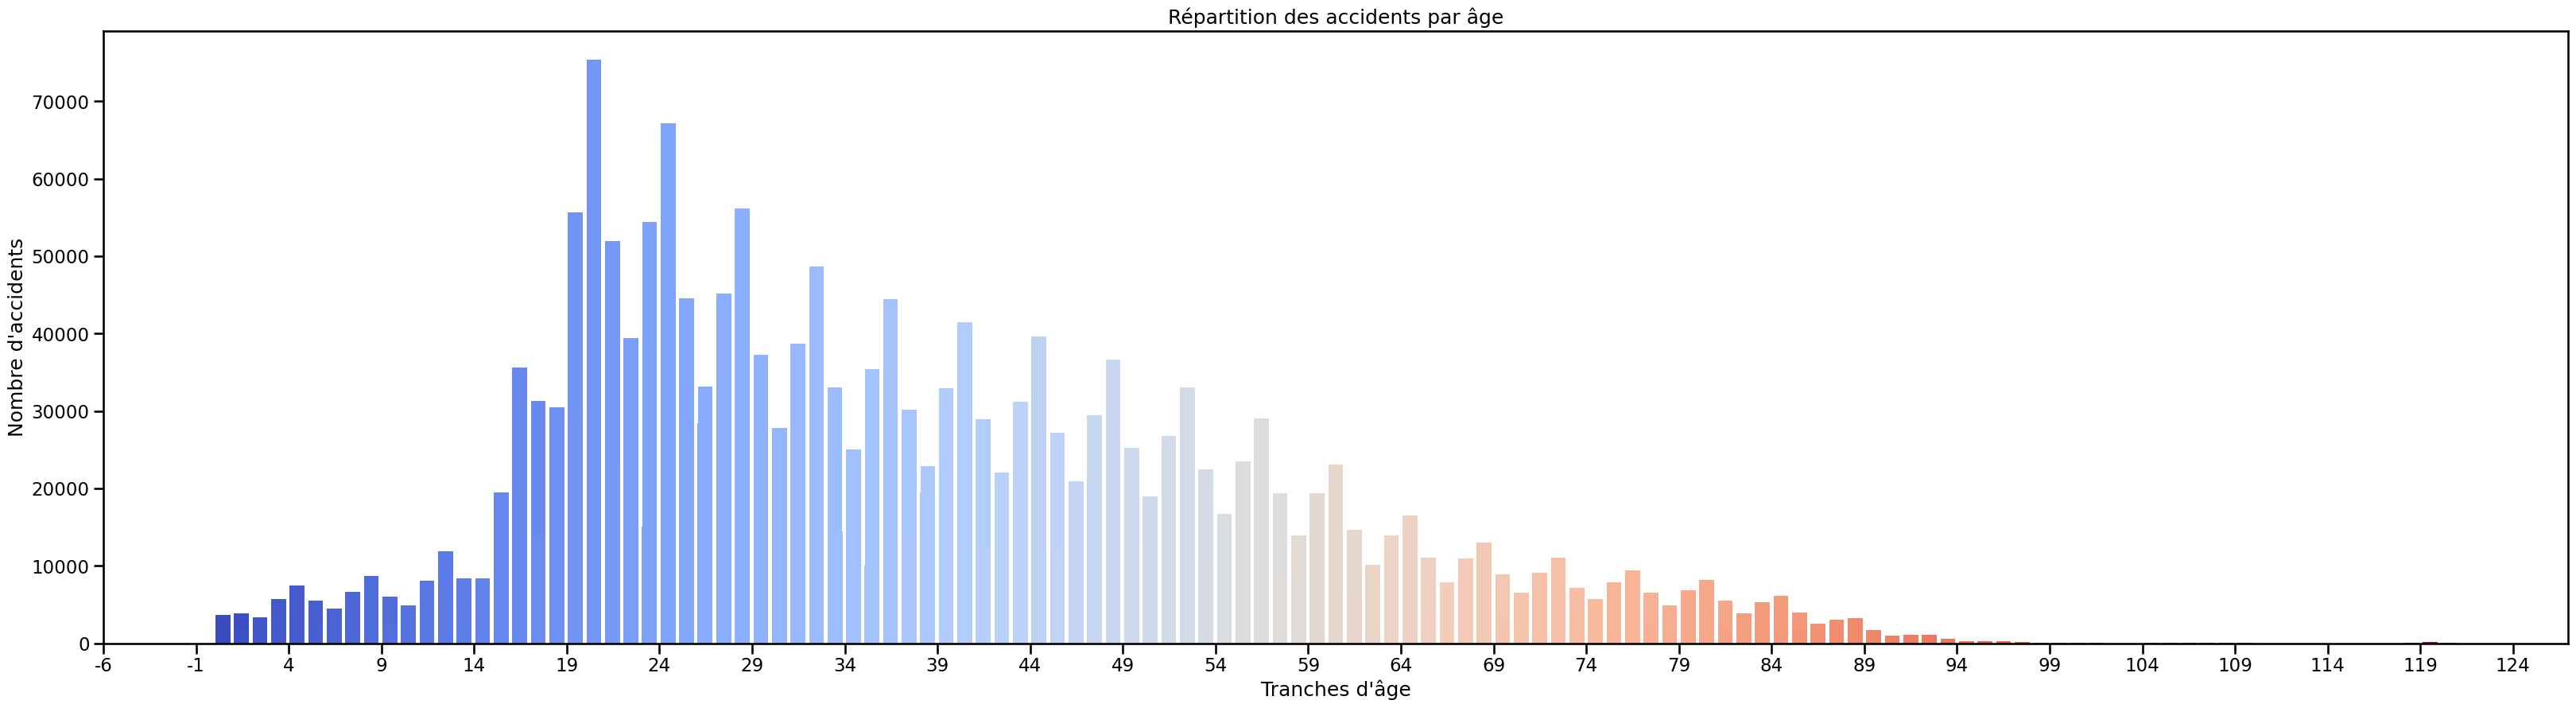

In [169]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(40, 10))

# Calcul des valeurs d'âge et le nombre d'accidents par âge
age_values, age_counts = np.unique(usag['age_acc_an'], return_counts=True)

# Création d'une liste de couleurs personnalisées
colors = plt.cm.get_cmap('coolwarm')(np.linspace(0, 1, len(age_values)))

# Affichage du graphique avec les couleurs personnalisées par âge
ax.bar(age_values, age_counts, color=colors)

# Définir les labels et le titre du graphique
ax.set_xlabel('Tranches d\'âge')
ax.set_ylabel("Nombre d'accidents")
ax.set_title('Répartition des accidents par âge')

# Ajustement des valeurs et des étiquettes de l'axe des abscisses
start, end = ax.get_xlim()
ax.set_xticks(np.arange(start, end+1, 5))
ax.set_xticklabels(np.arange(start, end+1, 5))

# Suppression des chiffres après la virgule sur l'axe des abscisses
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

plt.show()
     

In [214]:
type(usag["age_acc_an"])

pandas.core.series.Series

In [ ]:
# Les tranches d'âge identifiées sont les suivantes :

'''Moins de 14 ans : enfants et pré-adolescents
15-17 ans : adolescents +
18-24 ans : jeunes majeures
25-34 ans : adultes jeunes
35-44 ans : adultes d'âge moyen
45-54 ans : adultes d'âge moyen avancé
55-64 ans : adultes d'âge mûr
65 ans et plus : personnes âgées ou seniors'''

# Nota : la tranche d'âge 15-17 ans est identifiée comme pertinente à dissocier de la tranche d'âge "moins de 14 ans" car cette tranche correspond à la tranche d'âge de la conduite accompagnée (à partir de 15 ans).
 

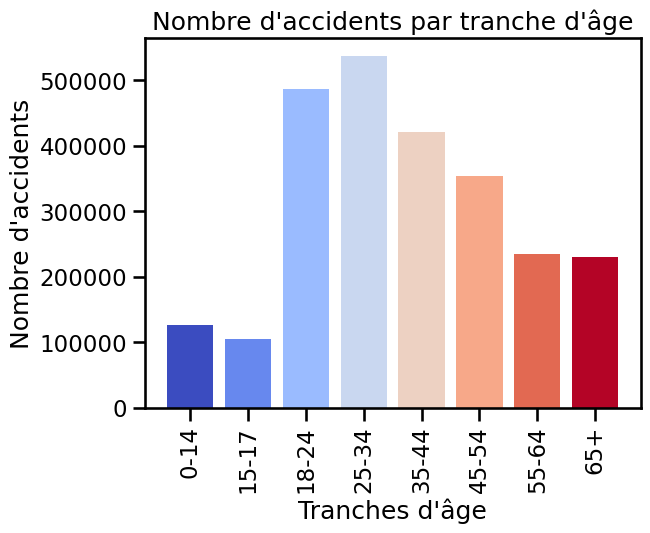

In [247]:

# Découpage des valeurs de la colonne "age_acc" selon les tranches d'âge identifiées commme pertinentes :
tranches_ages = pd.cut(usag['age_acc_an'], bins=[0, 15, 18, 25, 35, 45, 55, 65, float('inf')], labels=['0-14', '15-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# Compter le nombre d'accidents par tranche d'âge
nb_accidents_par_tranche_age = tranches_ages.value_counts().sort_index()

# Création d'une liste de couleurs personnalisées
colors = plt.cm.get_cmap('coolwarm')(np.linspace(0, 1, len(nb_accidents_par_tranche_age)))

# Affichage du graphique avec les couleurs personnalisées par âge
plt.bar(nb_accidents_par_tranche_age.index, nb_accidents_par_tranche_age.values, color=colors)

# Afficher le graphique
plt.xticks(rotation='vertical')
plt.xlabel("Tranches d'âge")
plt.ylabel("Nombre d'accidents")
plt.title("Nombre d'accidents par tranche d'âge")
plt.show()


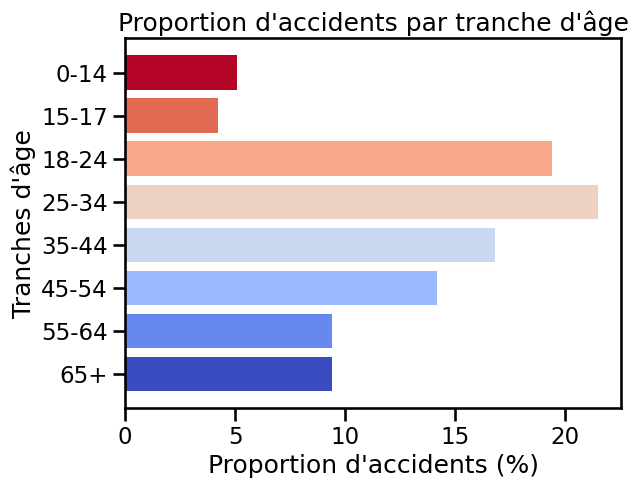

In [184]:

# Calcul de la proportion d'accidents en pourcentage
proportion_accidents = (nb_accidents_par_tranche_age / nb_accidents_par_tranche_age.sum()) * 100

# Création d'une liste de couleurs personnalisées
colors = plt.cm.get_cmap('coolwarm')(np.linspace(0, 1, len(nb_accidents_par_tranche_age)))

# Affichage du graphique avec les couleurs personnalisées par âge
plt.barh(nb_accidents_par_tranche_age.index[::-1], proportion_accidents[::-1], color=colors)

# Afficher le graphique
plt.xlabel("Proportion d'accidents (%)")
plt.ylabel("Tranches d'âge")
plt.title("Proportion d'accidents par tranche d'âge")
plt.show()
     

In [178]:
# Définition des étiquettes de chaque tranche d'âge
age_labels = ['Moins de 14 ans', '15-17 ans', '18-24 ans', '25-34 ans',
              '35-44 ans', '45-54 ans', '55-64 ans', 'Plus de 65 ans']


In [208]:
durations = usag["age_acc_an"]

# Find the 75th and 25th percentiles
q3 = durations.quantile(0.75)
q1 = durations.quantile(0.25)

# Calculate iqr
iqr = q3 - q1

# Calculate the thresholds
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

# Determine the outlier threshold
#threshold2 = 1.5 * iqr
#threshold1 = 0.5 * iqr

In [216]:
usag.shape

(2509620, 25)

In [217]:
# Remove the outliers from planes
# Subset the data
usag = usag[(usag["age_acc_an"] > lower) & (usag["age_acc_an"] < upper)]
#print(usag["age_acc_an"].describe())

In [218]:
usag.shape

(2498960, 25)

In [220]:
# Identify the duration categories
category1 = durations[durations < q1]
category2 = durations[(durations >= q1) & (durations< q1 + (iqr/3))]
category3 = durations[(durations >= q1 + (iqr/3)) & (durations < q1 + 2*(iqr/3))]
category4 = durations[(durations >= q1 + 2*(iqr/3)) & (durations < q3)]
category5 = durations[durations >= q3]

In [221]:
# Print the resulting categories
print("Category 1:", category1.values)
print("Category 2:", category2.values)
print("Category 3:", category3.values)
print("Category 4:", category4.values)
print("Category 5:", category4.values)

Category 1: [ 1.00273973  7.00547945 14.0109589  ... 20.01369863 19.01369863
 22.01643836]
Category 2: [29.02191781 26.01917808 27.01917808 ... 31.02191781 28.01917808
 23.01643836]
Category 3: [37.02739726 33.02465753 40.02739726 ... 38.02739726 32.02191781
 36.02465753]
Category 4: [41.03013699 49.03561644 41.03013699 ... 46.03287671 45.03287671
 46.03287671]
Category 5: [41.03013699 49.03561644 41.03013699 ... 46.03287671 45.03287671
 46.03287671]


In [222]:
category1.unique()

array([ 1.00273973,  7.00547945, 14.0109589 , 22.01643836, 15.0109589 ,
       19.01369863, 21.01643836, 20.01369863, 18.01369863, 16.0109589 ,
       17.01369863, 12.00821918,  8.00547945, 10.00821918,  5.00547945,
        6.00547945,  4.00273973, 11.00821918,  2.00273973, 13.0109589 ,
        3.00273973,  0.        ,  9.00821918, 13.00821918, 21.01369863,
        5.00273973, 17.0109589 ,  9.00547945,  1.        , 22.01369863,
       14.00821918, 18.0109589 ,  6.00273973, 10.00547945,  2.        ,
       11.00547945, 19.0109589 , 15.00821918, 23.01369863,  7.00273973,
        3.        ])

In [223]:
display(category1.min())
display(category1.max())
display(len(category1))

0.0

23.013698630136986

600202

In [224]:
display(category2.min())
display(category2.max())
display(len(category2))

23.016438356164382

31.02191780821918

516310

In [225]:
display(category3.min())
display(category3.max())
display(len(category3))

32.02191780821918

40.02739726027397

401422

In [226]:
display(category4.min())
display(category4.max())
display(len(category4))

41.02739726027397

49.035616438356165

349807

In [227]:
display(category5.min())
display(category5.max())
display(len(category5))

50.032876712328765

120.07945205479452

636394

In [233]:
# Découpage des valeurs de la colonne "age_acc" selon les tranches d'âge identifiées commme pertinentes :
usag['tranches_ages'] = pd.cut(usag['age_acc_an'], 
                       bins=[0, category1.max(), category2.max(), category3.max(), category4.max(), category5.max()], 
                       labels=['0-22', '23-31', '32-40', '41-50', '50+'])

In [229]:
# Compter le nombre d'accidents par tranche d'âge
nb_accidents_par_tranche_age = usag['tranches_ages'].value_counts().sort_index()

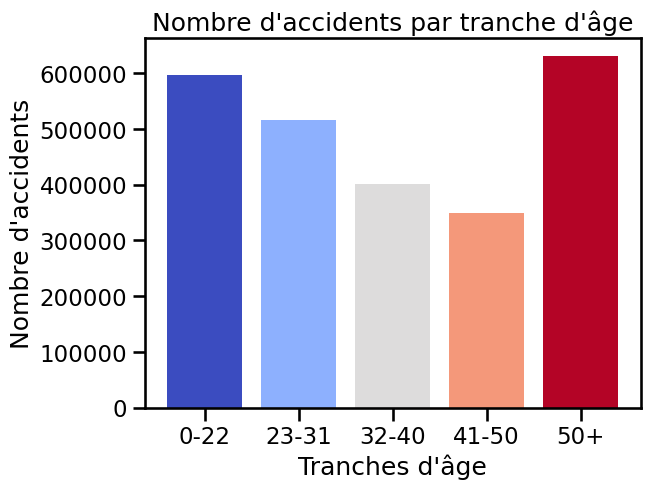

In [230]:
# Création d'une liste de couleurs personnalisées
colors = plt.cm.get_cmap('coolwarm')(np.linspace(0, 1, len(nb_accidents_par_tranche_age)))

# Affichage du graphique avec les couleurs personnalisées par âge
plt.bar(nb_accidents_par_tranche_age.index, nb_accidents_par_tranche_age.values, color=colors)

# Afficher le graphique
plt.xlabel("Tranches d'âge")
plt.ylabel("Nombre d'accidents")
plt.title("Nombre d'accidents par tranche d'âge")
plt.show()

In [246]:
usag['tranches_ages'].value_counts(normalize=True, dropna=False).round(2)*100

50+      25.0
0-22     24.0
23-31    21.0
32-40    16.0
41-50    14.0
NaN       0.0
Name: tranches_ages, dtype: float64

In [231]:
# Count the number of missing values in each column
print(usag.isna().sum())

Unnamed: 0               0
num_acc                  0
place               121823
catu                  3542
grav                     0
sexe                     0
trajet                 492
secu                419060
locp                 56260
actp                 56361
etatp                56317
an_nais                  0
num_veh                  0
annee                    0
id_vehicule        2135775
secu1              2135775
secu2              2135775
secu3              2135775
secuUn               55875
secuDeux             55875
secuTrois          2135775
an_naiss                 0
age_acc                  0
age_acc_seconds          0
age_acc_an               0
dtype: int64


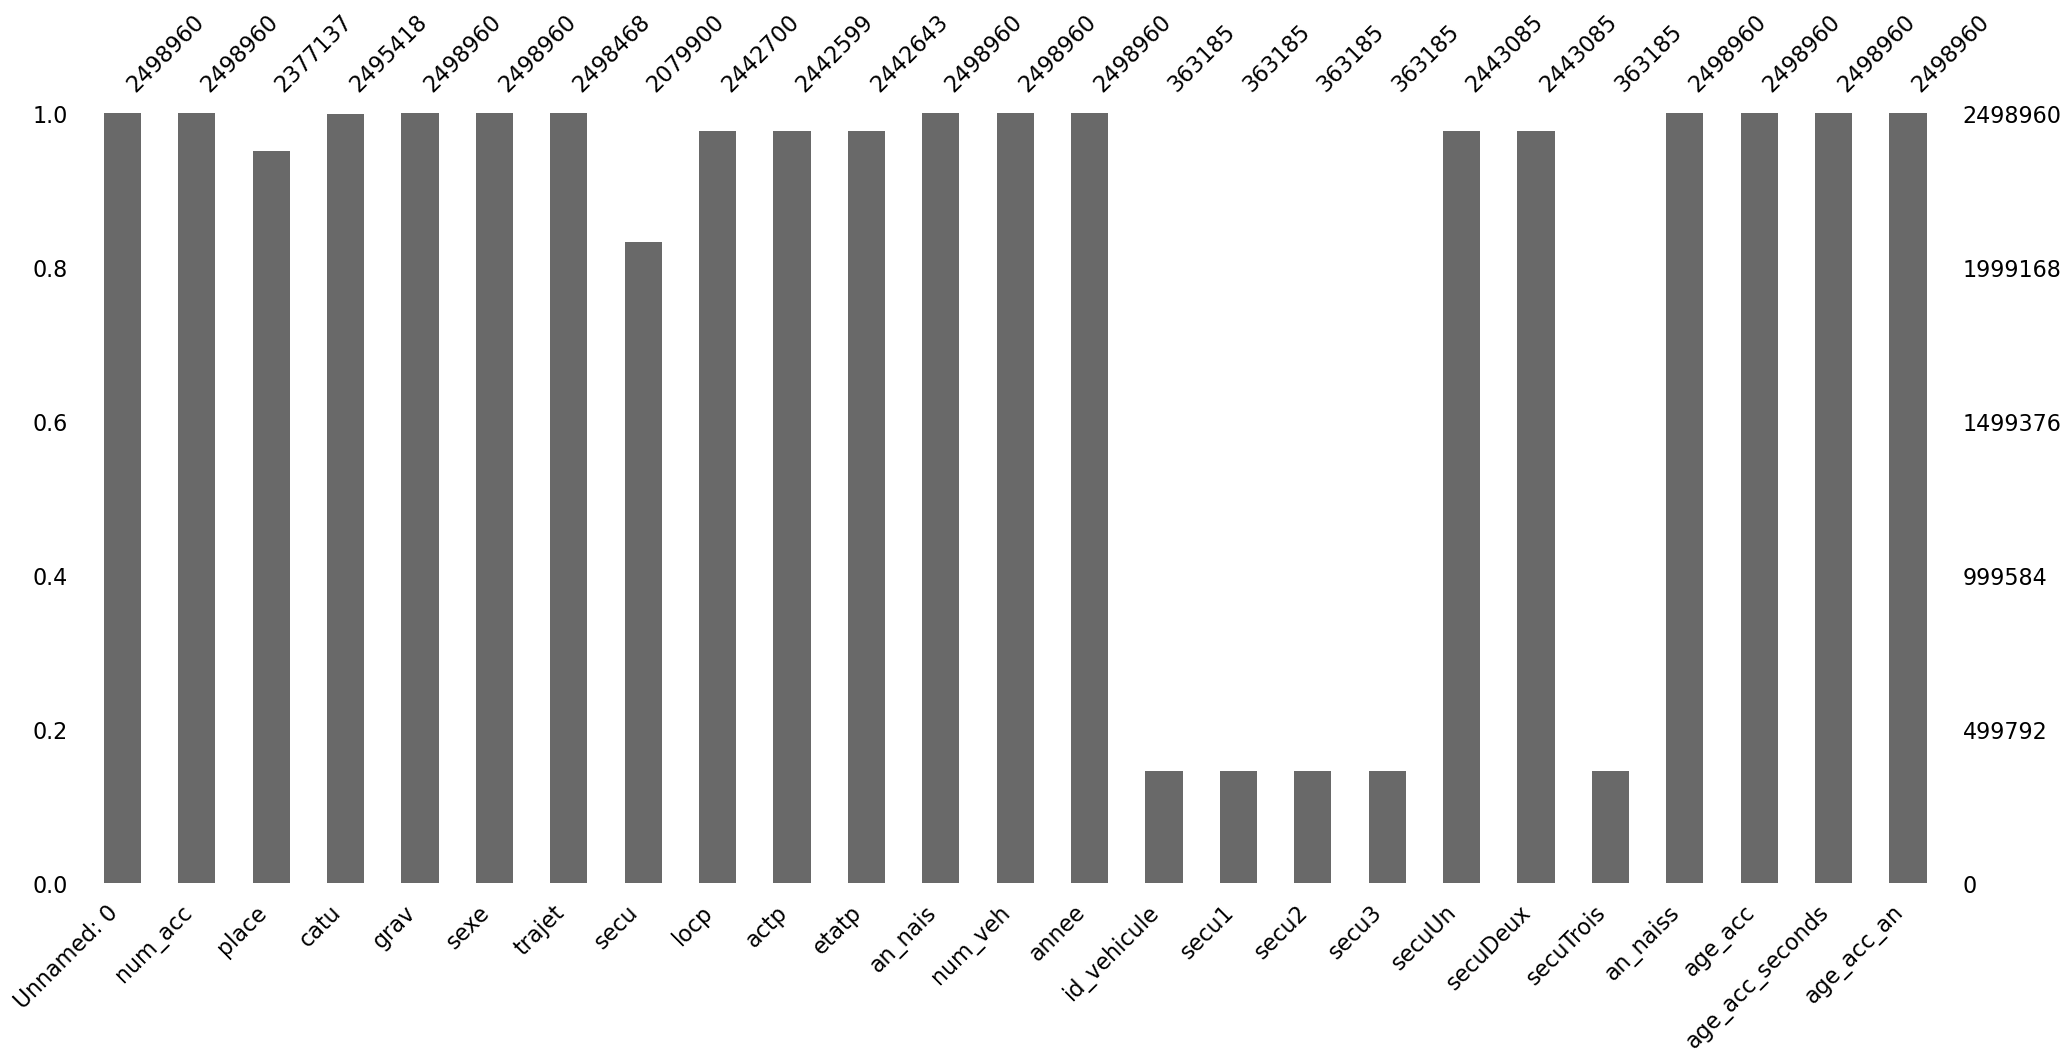

In [232]:
msno.bar(usag);

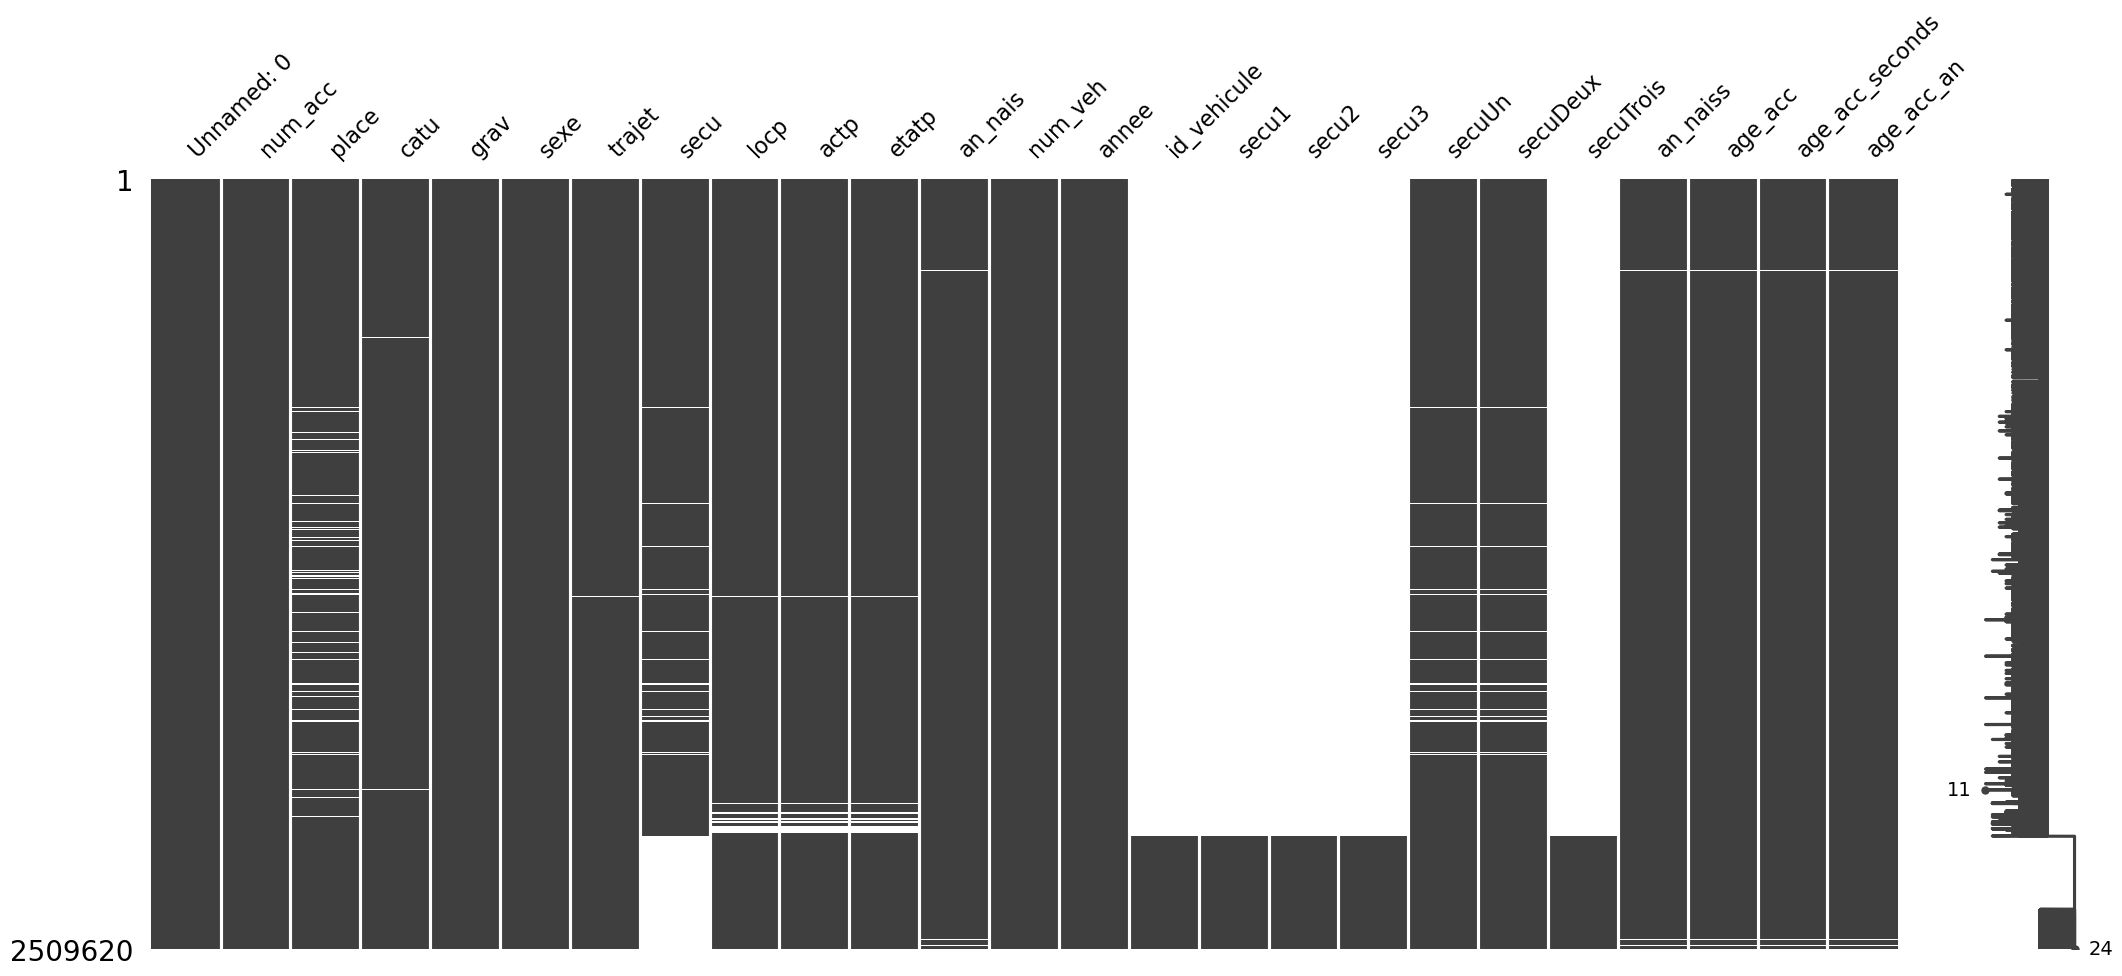

In [175]:
## Plot nullity matrix of usages
fig = msno.matrix(usag)

##### Colonnes à supprimer 
 - secu1 : reporté dans secuUn
 - secu2 : reporté dans secuDeux
 - secu3 : non renseigné à 99%
 - secu : transféré vers secuUn et secuDeux
 - 'Unnamed: 0'
 

In [234]:
usag.columns

Index(['Unnamed: 0', 'num_acc', 'place', 'catu', 'grav', 'sexe', 'trajet',
       'secu', 'locp', 'actp', 'etatp', 'an_nais', 'num_veh', 'annee',
       'id_vehicule', 'secu1', 'secu2', 'secu3', 'secuUn', 'secuDeux',
       'secuTrois', 'an_naiss', 'age_acc', 'age_acc_seconds', 'age_acc_an',
       'tranches_ages'],
      dtype='object')

In [235]:
# Suppression des colonnes ayant peu d'intérêts de notre point de vue : 
usag.drop(columns=['Unnamed: 0', "secu1", "secu2", 'secu3', 'secu'], inplace=True)
usag.columns

Index(['num_acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'locp', 'actp',
       'etatp', 'an_nais', 'num_veh', 'annee', 'id_vehicule', 'secuUn',
       'secuDeux', 'secuTrois', 'an_naiss', 'age_acc', 'age_acc_seconds',
       'age_acc_an', 'tranches_ages'],
      dtype='object')

##### Données non représentatives 
 - locp : avec 85% de valeurs rempli par la valeur 0, soit "sans objet"
 - etatp : non renseigné à 92%
 - actp : non renseigné cumulé à 92%
 - secu3 : non renseigné à 99%
 - secu : transféré vers secuUn et secuDeux
 

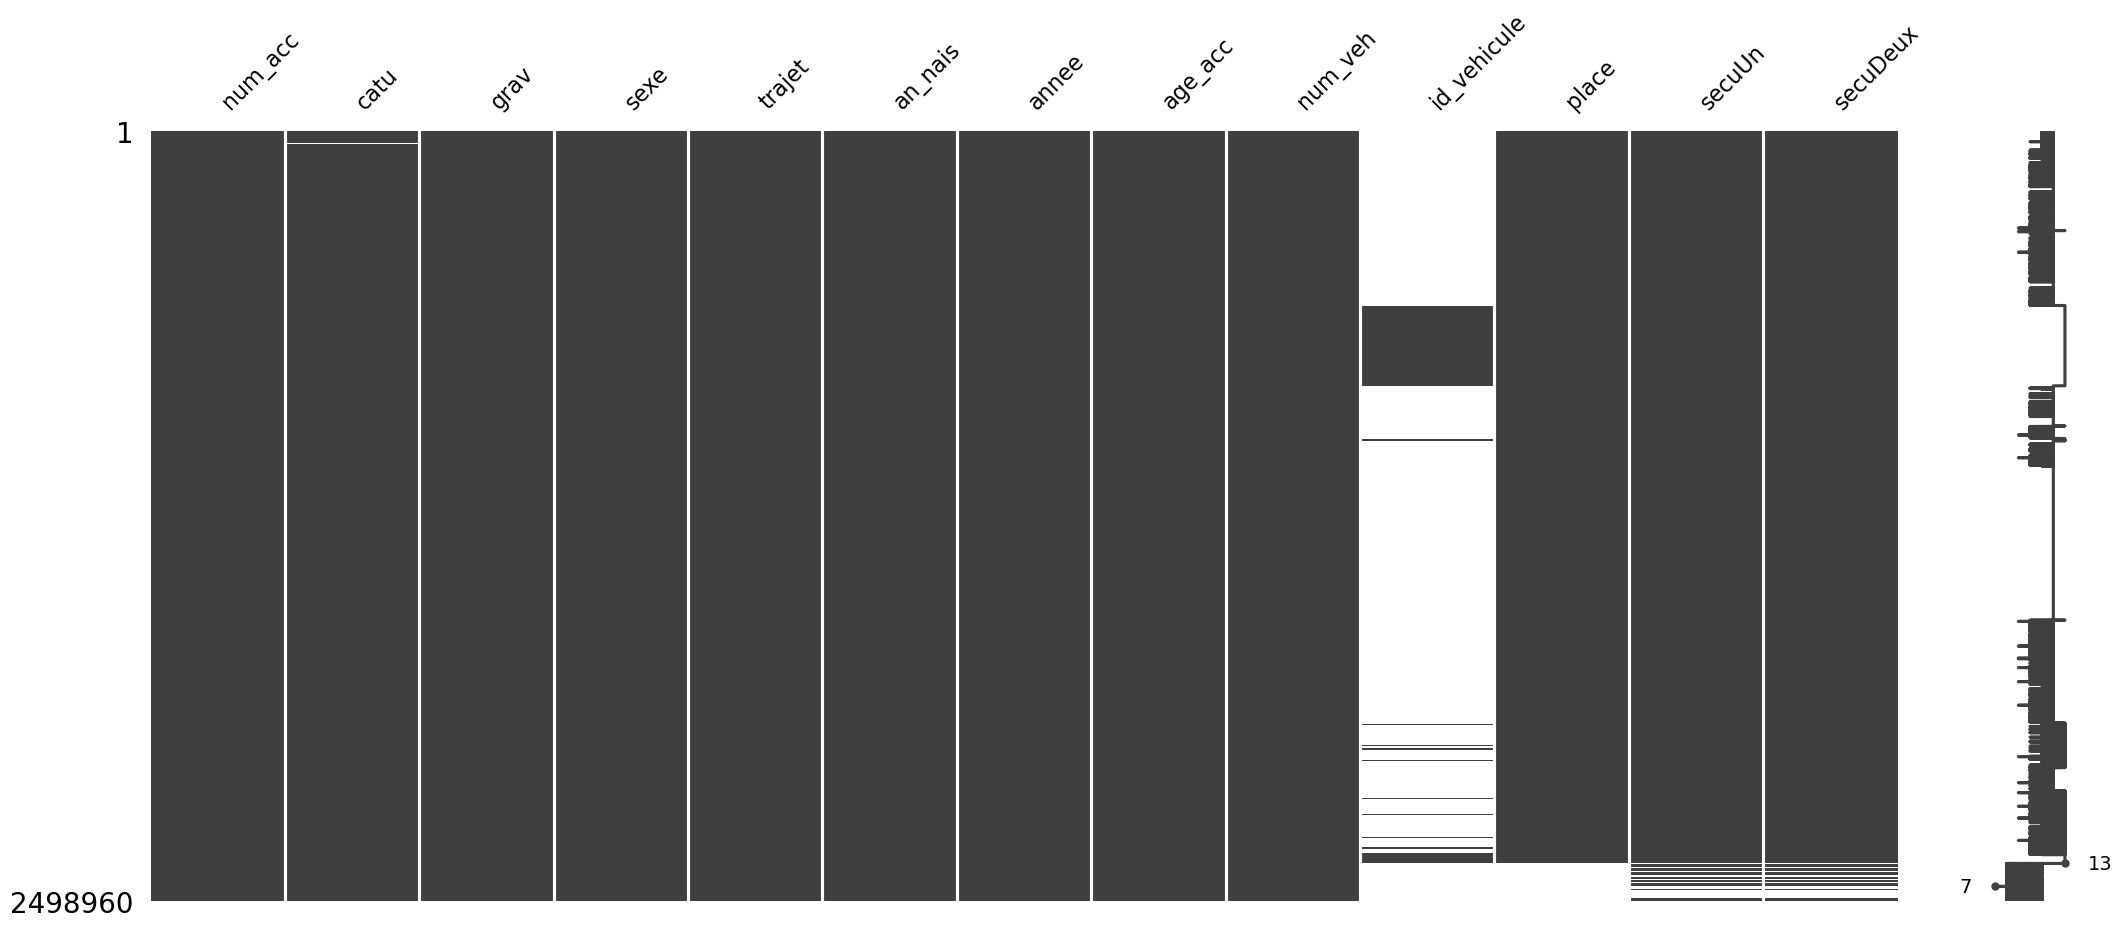

In [236]:
## Plot nullity matrix of lieux
fig = msno.matrix(usag[['num_acc', 'catu', 'grav', 'sexe', 'trajet',
       'an_nais', 'annee', 'age_acc', 'num_veh', 'id_vehicule', 'place', 'secuUn', 'secuDeux']].sort_values("place"))

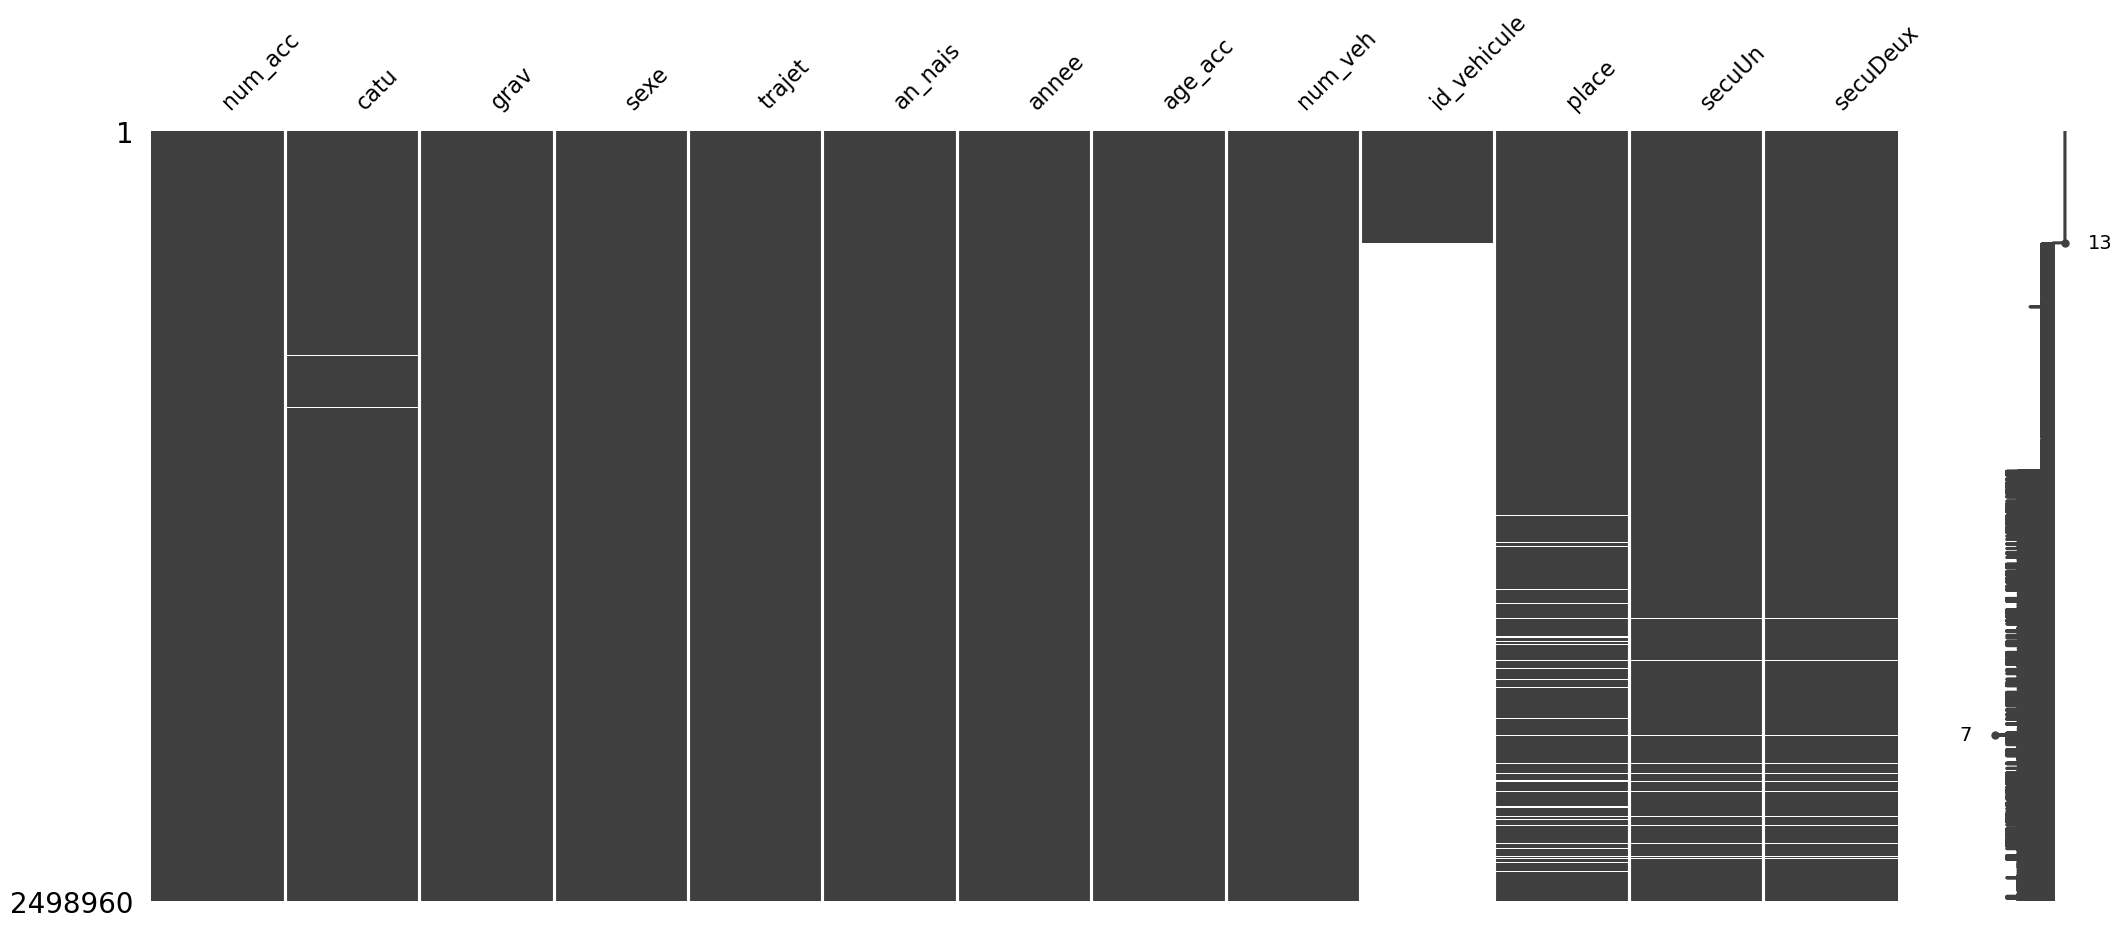

In [237]:
## Plot nullity matrix of lieux
fig = msno.matrix(usag[['num_acc', 'catu', 'grav', 'sexe', 'trajet',
       'an_nais', 'annee', 'age_acc', 'num_veh', 'id_vehicule', 'place', 'secuUn', 'secuDeux']].sort_values("id_vehicule"))

#sns.scatterplot(data=usag.sort_values('annee'), x='annee', y='id_vehicule')
#plt.xticks(rotation=90);

In [238]:
# Le tableau croisé peut aider à identifier comment les observations se combinent.
pd.crosstab(usag['annee'], usag['id_vehicule'], rownames=["Année de l'accident"], colnames=["ID véhicule"])

ID véhicule,100 882,100 883,100 884,100 885,100 886,100 887,100 888,100 889,100 890,100 891,...,201 752,201 753,201 754,201 758,201 759,201 761,201 762,201 763,201 764,201 765
Année de l'accident,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1


In [239]:
usag.groupby('annee')['id_vehicule'].count()

annee
2005-01-01         0
2006-01-01         0
2007-01-01         0
2008-01-01         0
2009-01-01         0
2010-01-01         0
2011-01-01         0
2012-01-01         0
2013-01-01         0
2014-01-01         0
2015-01-01         0
2016-01-01         0
2017-01-01         0
2018-01-01         0
2019-01-01    132412
2020-01-01    105017
2021-01-01    125756
Name: id_vehicule, dtype: int64

In [240]:
# Suppression des colonnes ayant peu d'intérêts de notre point de vue : 
#usag.drop(columns=['id_vehicule'], inplace=True)
#usag.columns

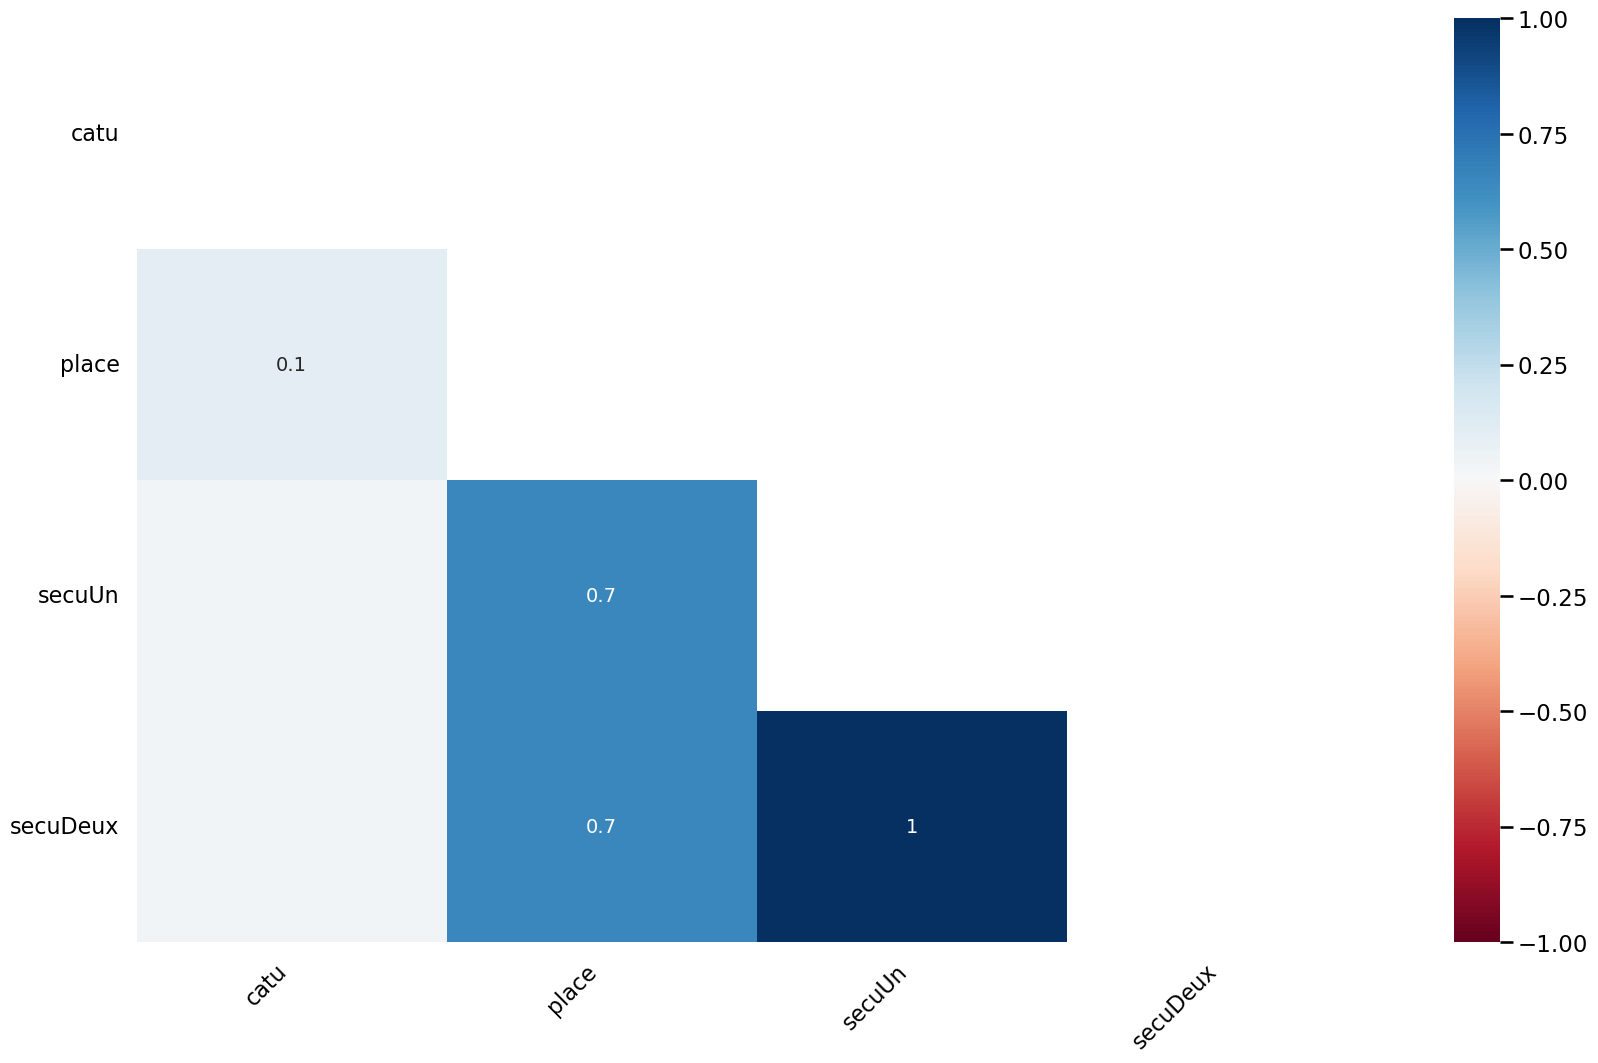

In [241]:
# Finding correlations in your data
# Une heatmap de corrélations entre toutes les variables du DataFrame permet de repérer les variables importantes 
#   et celles colinéaires entre elles.
# Plot missingness heatmap of usag
msno.heatmap(usag[['catu', 'an_nais', 'annee', 'num_veh', 'place', 'secuUn', 'secuDeux']]);

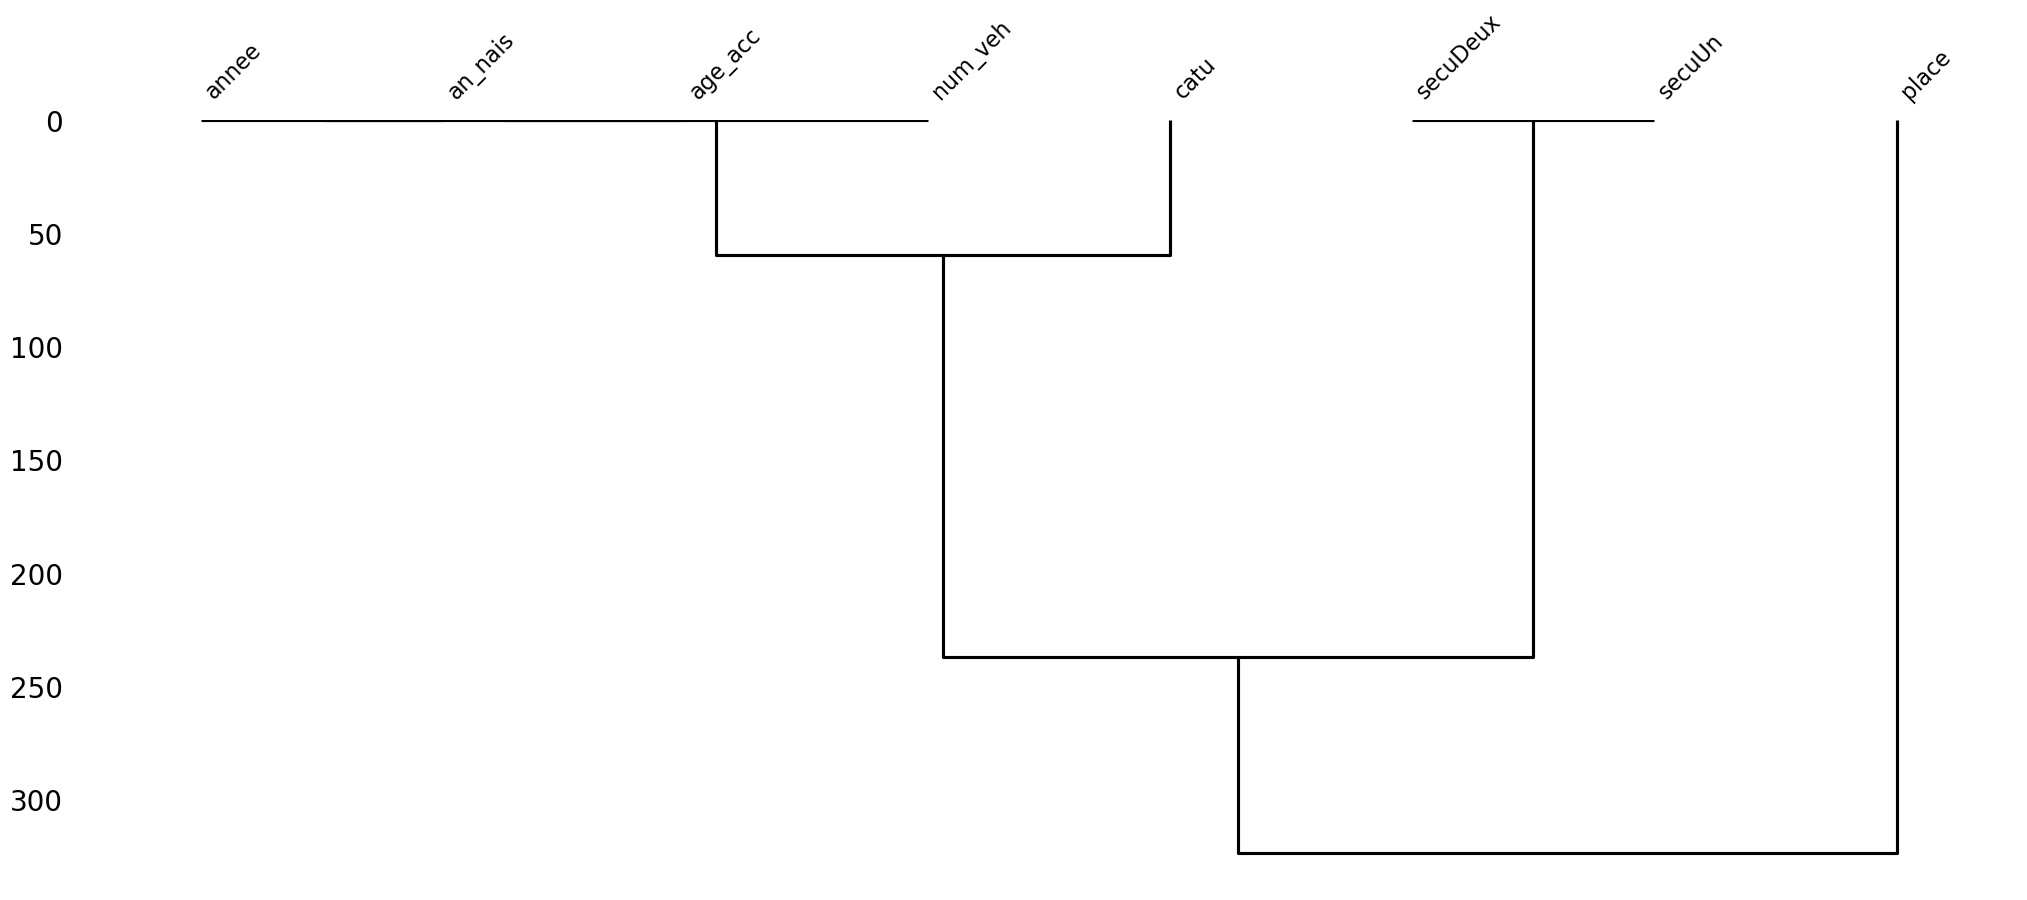

In [242]:
# dendrogramme
# Plot missingness dendrogram of usag
msno.dendrogram(usag[['catu', 'an_nais', 'annee', 'age_acc', 'num_veh', 'place', 'secuUn', 'secuDeux']]);

In [243]:
usag.dtypes

num_acc                    float64
place                     category
catu                      category
grav                      category
sexe                      category
trajet                    category
locp                      category
actp                      category
etatp                     category
an_nais             datetime64[ns]
num_veh                     object
annee               datetime64[ns]
id_vehicule                 object
secuUn                    category
secuDeux                  category
secuTrois                 category
an_naiss            datetime64[ns]
age_acc            timedelta64[ns]
age_acc_seconds            float64
age_acc_an                 float64
tranches_ages             category
dtype: object

In [244]:
# Export DataFrame to csv
usag.to_csv("usag5.csv")

In [245]:
# Group the adult dataset by "Sexe" and "gravité"
gb = usag.groupby(by=["sexe", "grav"])

# Print out how many rows are in each created group
print(gb.size())

# Print out the mean of each group for all columns
print(gb.mean())

sexe           grav              
Non renseigné  Indemne                    2
               Blessé léger               0
               Blessé hospitalisé         0
               Tué                        0
               -1                         0
Masculin       Indemne               734744
               Blessé léger          555851
               Blessé hospitalisé    342308
               Tué                    50896
               -1                         0
Féminin        Indemne               289097
               Blessé léger          353862
               Blessé hospitalisé    156745
               Tué                    15455
               -1                         0
dtype: int64
                                       num_acc  age_acc_seconds  age_acc_an
sexe          grav                                                         
Non renseigné Indemne             2.021000e+11     8.994240e+08   28.520548
              Blessé léger                 NaN              NaN  